In [1]:
from datetime import datetime, timedelta ,timezone
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import numpy as np

Part 1

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import yfinance as yf

# Data Collectionا
start_date = '2021-07-01'
end_date = '2023-12-01'
tickerData = yf.Ticker('ETH-USD')
currency = tickerData.history(period="1d", start=start_date, end=end_date)
currency = currency[['Close']]
currency

Close
Date                                  
2021-07-01 00:00:00+00:00  2113.605469
2021-07-02 00:00:00+00:00  2150.040283
2021-07-03 00:00:00+00:00  2226.114258
2021-07-04 00:00:00+00:00  2321.724121
2021-07-05 00:00:00+00:00  2198.582520
...                                ...
2023-11-26 00:00:00+00:00  2063.286133
2023-11-27 00:00:00+00:00  2027.417358
2023-11-28 00:00:00+00:00  2049.338135
2023-11-29 00:00:00+00:00  2029.929199
2023-11-30 00:00:00+00:00  2052.556152

[883 rows x 1 columns]

In [4]:
train_end = datetime(2023, 7, 1, tzinfo=timezone.utc)
test_end = datetime(2023, 12, 1, tzinfo=timezone.utc)

train_data = currency[:train_end]
test_data = currency.loc[train_end + timedelta(days=1):test_end]

Part 2

In [5]:
def find_best_arima(data):
    best_aic = np.inf
    best_model = None
    best_order = None

    for p in range(6):
        for q in range(6):
            try:
                model = ARIMA(data, order=(p,0,q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_model = results
                    best_order = (p,0,q)
            except:
                    continue
    return best_model, best_order

In [6]:
!pip install arch

In [7]:
from arch import arch_model


def generate_signals():
    signals = []
    
    for i in range(len(test_data)):
        window_data = currency.iloc[i:i + len(train_data)]

        best_model, best_order = find_best_arima(window_data)
        
        residuals = best_model.resid
        
        am = arch_model(residuals, vol="Garch", p=best_order[0], q=best_order[2])
        garch_model = am.fit()
        
        
        garch_forecast = garch_model.forecast(horizon=1)
        garch_mean = garch_forecast.mean
        signals.append(garch_mean.iloc[-1])
        
    data = [m[0] for m in signals]
    return pd.DataFrame(data, columns=['Signal'], index=test_data.index)


In [8]:
training = generate_signals()

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4688.653956434093
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4297.256967941733
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4267.0505038192805
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4305.025497804934
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4263.736554685903
Iteration:      6,   Func. Count:     53,   Neg. LLF: 4278.763381589411
Iteration:      7,   Func. Count:     62,   Neg. LLF: 4263.51768376164
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4263.499451742928
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4263.498180238912
Iteration:     10,   Func. Count:     87,   Neg. LLF: 4263.492857535693
Iteration:     11,   Func. Count:     95,   Neg. LLF: 4263.480471528819
Iteration:     12,   Func. Count:    103,   Neg. LLF: 4263.448151979592
Iteration:     13,   Func. Count:    111,   Neg. LLF: 4263.365579247029
Iteration:     14,   Func. Count:    119,   Neg. LLF: 4263.16985

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4687.011991116248
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4296.267409503447
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4265.786068303481
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4290.171288497116
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4262.562554442098
Iteration:      6,   Func. Count:     53,   Neg. LLF: 4276.526911296855
Iteration:      7,   Func. Count:     62,   Neg. LLF: 4264.55175525454
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4262.327449943979
Iteration:      9,   Func. Count:     81,   Neg. LLF: 4262.291982490264
Iteration:     10,   Func. Count:     89,   Neg. LLF: 4262.290952697542
Iteration:     11,   Func. Count:     97,   Neg. LLF: 4262.28531014716
Iteration:     12,   Func. Count:    105,   Neg. LLF: 4262.2570080171445
Iteration:     13,   Func. Count:    113,   Neg. LLF: 4262.117349141987
Iteration:     14,   Func. Count:    121,   Neg. LLF: 4261.469430

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4683.775909734332
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4294.838819025659
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4264.01615461501
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4286.335812989545
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4260.756482639379
Iteration:      6,   Func. Count:     53,   Neg. LLF: 4274.830414011474
Iteration:      7,   Func. Count:     62,   Neg. LLF: 4262.258214761317
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4260.527488924911
Iteration:      9,   Func. Count:     81,   Neg. LLF: 4260.494469055866
Iteration:     10,   Func. Count:     89,   Neg. LLF: 4260.493422409031
Iteration:     11,   Func. Count:     97,   Neg. LLF: 4260.48750764073
Iteration:     12,   Func. Count:    105,   Neg. LLF: 4260.457789266081
Iteration:     13,   Func. Count:    113,   Neg. LLF: 4260.3112152958165
Iteration:     14,   Func. Count:    121,   Neg. LLF: 4259.631007

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4682.308118214726
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4293.071617177406
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4262.64699254086
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4279.115759070661
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4259.266187628891
Iteration:      6,   Func. Count:     53,   Neg. LLF: 4273.190875471676
Iteration:      7,   Func. Count:     62,   Neg. LLF: 4260.070402152618
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4259.032704316732
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4259.025225649146
Iteration:     10,   Func. Count:     87,   Neg. LLF: 4259.024439483134
Iteration:     11,   Func. Count:     95,   Neg. LLF: 4259.019484362921
Iteration:     12,   Func. Count:    103,   Neg. LLF: 4258.991487281846
Iteration:     13,   Func. Count:    111,   Neg. LLF: 4258.839353195053
Iteration:     14,   Func. Count:    119,   Neg. LLF: 4258.074233

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4683.5215523922025
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4292.674430984307
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4261.792398814955
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4278.882595137764
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4258.263823917103
Iteration:      6,   Func. Count:     53,   Neg. LLF: 4271.757692229373
Iteration:      7,   Func. Count:     62,   Neg. LLF: 4259.786593783011
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4258.04325860253
Iteration:      9,   Func. Count:     81,   Neg. LLF: 4257.969961074465
Iteration:     10,   Func. Count:     89,   Neg. LLF: 4257.969079564878
Iteration:     11,   Func. Count:     97,   Neg. LLF: 4257.963763541377
Iteration:     12,   Func. Count:    105,   Neg. LLF: 4257.934510238449
Iteration:     13,   Func. Count:    113,   Neg. LLF: 4257.782991242893
Iteration:     14,   Func. Count:    121,   Neg. LLF: 4257.06695

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4679.8744235662525
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4291.036008088708
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4260.668557478622
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4309.3469299002945
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4257.556881842151
Iteration:      6,   Func. Count:     53,   Neg. LLF: 4275.2335419414985
Iteration:      7,   Func. Count:     62,   Neg. LLF: 4257.341338493735
Iteration:      8,   Func. Count:     70,   Neg. LLF: 4257.319891726882
Iteration:      9,   Func. Count:     78,   Neg. LLF: 4257.318914213145
Iteration:     10,   Func. Count:     86,   Neg. LLF: 4257.316594176244
Iteration:     11,   Func. Count:     94,   Neg. LLF: 4257.310483973486
Iteration:     12,   Func. Count:    102,   Neg. LLF: 4257.294847150273
Iteration:     13,   Func. Count:    110,   Neg. LLF: 4257.251814143798
Iteration:     14,   Func. Count:    118,   Neg. LLF: 4257.14

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4682.563024503572
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4291.065628445871
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4260.270020881926
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4297.143670343121
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4256.912023617138
Iteration:      6,   Func. Count:     53,   Neg. LLF: 4272.762393723286
Iteration:      7,   Func. Count:     62,   Neg. LLF: 4256.673432850437
Iteration:      8,   Func. Count:     70,   Neg. LLF: 4256.666192349907
Iteration:      9,   Func. Count:     78,   Neg. LLF: 4256.665352324183
Iteration:     10,   Func. Count:     86,   Neg. LLF: 4256.65960835496
Iteration:     11,   Func. Count:     94,   Neg. LLF: 4256.6463870778
Iteration:     12,   Func. Count:    102,   Neg. LLF: 4256.610014960632
Iteration:     13,   Func. Count:    110,   Neg. LLF: 4256.5175813556
Iteration:     14,   Func. Count:    118,   Neg. LLF: 4256.2562158697

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4681.988244742923
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4289.716386303362
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4258.397180718629
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4282.776672660911
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4255.306527847591
Iteration:      6,   Func. Count:     53,   Neg. LLF: 4270.254255830934
Iteration:      7,   Func. Count:     62,   Neg. LLF: 4255.964172884322
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4255.1008703928965
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4255.088311692416
Iteration:     10,   Func. Count:     87,   Neg. LLF: 4255.08751396797
Iteration:     11,   Func. Count:     95,   Neg. LLF: 4255.082752510743
Iteration:     12,   Func. Count:    103,   Neg. LLF: 4255.057530974293
Iteration:     13,   Func. Count:    111,   Neg. LLF: 4254.929792312216
Iteration:     14,   Func. Count:    119,   Neg. LLF: 4254.32031

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4681.748009392977
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4290.207782089352
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4256.784990438142
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4270.468563743092
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4253.841567325231
Iteration:      6,   Func. Count:     53,   Neg. LLF: 4260.631289464952
Iteration:      7,   Func. Count:     62,   Neg. LLF: 4254.165925623593
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4253.735937194232
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4253.734612517219
Iteration:     10,   Func. Count:     87,   Neg. LLF: 4253.733555494873
Iteration:     11,   Func. Count:     95,   Neg. LLF: 4253.728114610418
Iteration:     12,   Func. Count:    103,   Neg. LLF: 4253.700995829833
Iteration:     13,   Func. Count:    111,   Neg. LLF: 4253.56668888017
Iteration:     14,   Func. Count:    119,   Neg. LLF: 4252.936943

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4687.994507469184
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4288.628319142111
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4257.193745615202
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4266.4706922664045
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4253.912202201008
Iteration:      6,   Func. Count:     53,   Neg. LLF: 4262.769965802015
Iteration:      7,   Func. Count:     62,   Neg. LLF: 4254.692537502762
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4253.723522762244
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4253.733038626953
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4253.719133745924
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4253.717768832318
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4253.709269555029
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4253.663051066766
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4253.4264

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4687.794581541416
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4289.383022759848
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4255.483179552088
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4260.621458030999
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4252.373406364539
Iteration:      6,   Func. Count:     53,   Neg. LLF: 4252.315425769709
Iteration:      7,   Func. Count:     61,   Neg. LLF: 4252.616264500318
Iteration:      8,   Func. Count:     70,   Neg. LLF: 4252.230870653485
Iteration:      9,   Func. Count:     78,   Neg. LLF: 4252.229896849343
Iteration:     10,   Func. Count:     86,   Neg. LLF: 4252.226834707592
Iteration:     11,   Func. Count:     94,   Neg. LLF: 4252.217946765755
Iteration:     12,   Func. Count:    102,   Neg. LLF: 4252.195326115256
Iteration:     13,   Func. Count:    110,   Neg. LLF: 4252.1337279165655
Iteration:     14,   Func. Count:    118,   Neg. LLF: 4251.9790

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4700.849286775801
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4288.170155367028
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4256.884815735337
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4267.746202433669
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4253.278175621825
Iteration:      6,   Func. Count:     53,   Neg. LLF: 4257.951263425962
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4254.934505328074
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4252.986021753552
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4252.9775686686025
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4252.974735570143
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4252.973575779628
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4252.965369574635
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4252.945736859394
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4252.8935

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     10,   Neg. LLF: 4719.009576070919
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4301.781437593654
Iteration:      3,   Func. Count:     30,   Neg. LLF: 4270.947413302021
Iteration:      4,   Func. Count:     40,   Neg. LLF: 4289.715023171146
Iteration:      5,   Func. Count:     50,   Neg. LLF: 4304.673586524364
Iteration:      6,   Func. Count:     60,   Neg. LLF: 4270.972771468338
Iteration:      7,   Func. Count:     70,   Neg. LLF: 4263.999466520049
Iteration:      8,   Func. Count:     79,   Neg. LLF: 4264.083600489951
Iteration:      9,   Func. Count:     89,   Neg. LLF: 4269.702488710216
Iteration:     10,   Func. Count:     99,   Neg. LLF: 4263.309574401583
Iteration:     11,   Func. Count:    108,   Neg. LLF: 4263.365212477995
Iteration:     12,   Func. Count:    118,   Neg. LLF: 4263.286043998749
Iteration:     13,   Func. Count:    127,   Neg. LLF: 4263.281303824451
Iteration:     14,   Func. Count:    136,   Neg. LLF: 4263.28037

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     10,   Neg. LLF: 4709.597604919001
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4299.088908390331
Iteration:      3,   Func. Count:     30,   Neg. LLF: 4268.37691592471
Iteration:      4,   Func. Count:     40,   Neg. LLF: 4274.399859100446
Iteration:      5,   Func. Count:     50,   Neg. LLF: 4283.126610161051
Iteration:      6,   Func. Count:     60,   Neg. LLF: 4280.8099923341915
Iteration:      7,   Func. Count:     70,   Neg. LLF: 4262.558198993002
Iteration:      8,   Func. Count:     80,   Neg. LLF: 4262.468446889494
Iteration:      9,   Func. Count:     90,   Neg. LLF: 4262.585759606338
Iteration:     10,   Func. Count:    100,   Neg. LLF: 4261.85776729557
Iteration:     11,   Func. Count:    109,   Neg. LLF: 4261.945234275157
Iteration:     12,   Func. Count:    119,   Neg. LLF: 4262.344852961214
Iteration:     13,   Func. Count:    129,   Neg. LLF: 4261.817827681692
Iteration:     14,   Func. Count:    138,   Neg. LLF: 4261.815520

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     10,   Neg. LLF: 4728.6806474371
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4302.463186993682
Iteration:      3,   Func. Count:     30,   Neg. LLF: 4270.6055234756805
Iteration:      4,   Func. Count:     40,   Neg. LLF: 4286.239612617135
Iteration:      5,   Func. Count:     50,   Neg. LLF: 4284.144475320915
Iteration:      6,   Func. Count:     60,   Neg. LLF: 4323.6383529880595
Iteration:      7,   Func. Count:     70,   Neg. LLF: 4265.232602501421
Iteration:      8,   Func. Count:     80,   Neg. LLF: 4275.339576042688
Iteration:      9,   Func. Count:     90,   Neg. LLF: 4264.4082954005935
Iteration:     10,   Func. Count:    100,   Neg. LLF: 4263.88230138455
Iteration:     11,   Func. Count:    109,   Neg. LLF: 4263.901606949346
Iteration:     12,   Func. Count:    119,   Neg. LLF: 4263.877728433157
Iteration:     13,   Func. Count:    129,   Neg. LLF: 4263.872507423705
Iteration:     14,   Func. Count:    138,   Neg. LLF: 4263.86797

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4742.238049590904
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4288.466247787782
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4329.186135874332
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4320.051456936066
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4260.362886822642
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4260.7696946494325
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4258.438183309016
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4258.412929009149
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4258.402668134404
Iteration:     10,   Func. Count:     87,   Neg. LLF: 4258.4027619212375
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4258.400163408825
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4258.3884240178595
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4258.326426435756
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4258.22

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4740.859877532108
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4289.318996111031
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4337.998188185555
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4310.460125906734
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4262.501379373588
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4257.319468727813
Iteration:      7,   Func. Count:     62,   Neg. LLF: 4257.308666076647
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4284.430116568417
Iteration:      9,   Func. Count:     81,   Neg. LLF: 4257.015479343227
Iteration:     10,   Func. Count:     89,   Neg. LLF: 4257.005623840252
Iteration:     11,   Func. Count:     97,   Neg. LLF: 4257.004516373623
Iteration:     12,   Func. Count:    105,   Neg. LLF: 4256.997820988736
Iteration:     13,   Func. Count:    113,   Neg. LLF: 4256.963072756862
Iteration:     14,   Func. Count:    121,   Neg. LLF: 4256.78670

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     10,   Neg. LLF: 4680.0355992454
Iteration:      2,   Func. Count:     20,   Neg. LLF: 5020.559031644567
Iteration:      3,   Func. Count:     30,   Neg. LLF: 4832.510931834332
Iteration:      4,   Func. Count:     41,   Neg. LLF: 4275.302658139571
Iteration:      5,   Func. Count:     51,   Neg. LLF: 4262.8626492060375
Iteration:      6,   Func. Count:     61,   Neg. LLF: 4259.1523949198045
Iteration:      7,   Func. Count:     70,   Neg. LLF: 4270.582802091176
Iteration:      8,   Func. Count:     80,   Neg. LLF: 4269.669776040014
Iteration:      9,   Func. Count:     92,   Neg. LLF: 4259.607191252012
Iteration:     10,   Func. Count:    102,   Neg. LLF: 4257.661354538266
Iteration:     11,   Func. Count:    111,   Neg. LLF: 4257.617935450161
Iteration:     12,   Func. Count:    120,   Neg. LLF: 4257.604069338777
Iteration:     13,   Func. Count:    129,   Neg. LLF: 4257.599282213274
Iteration:     14,   Func. Count:    138,   Neg. LLF: 4257.59748

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     10,   Neg. LLF: 4766.797609028952
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4992.883215655472
Iteration:      3,   Func. Count:     30,   Neg. LLF: 4286.369220298469
Iteration:      4,   Func. Count:     40,   Neg. LLF: 4284.450164997753
Iteration:      5,   Func. Count:     50,   Neg. LLF: 4277.949875358082
Iteration:      6,   Func. Count:     60,   Neg. LLF: 4286.704689650134
Iteration:      7,   Func. Count:     70,   Neg. LLF: 4279.7689731517
Iteration:      8,   Func. Count:     80,   Neg. LLF: 4263.695139848018
Iteration:      9,   Func. Count:     89,   Neg. LLF: 4265.880370178146
Iteration:     10,   Func. Count:     99,   Neg. LLF: 4274.194410011161
Iteration:     11,   Func. Count:    109,   Neg. LLF: 4263.012630600877
Iteration:     12,   Func. Count:    118,   Neg. LLF: 4262.959878974561
Iteration:     13,   Func. Count:    127,   Neg. LLF: 4262.949628239423
Iteration:     14,   Func. Count:    136,   Neg. LLF: 4262.9440714

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4781.910447699377
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4286.977438801355
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4366.187790609181
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4281.090530241156
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4262.165426575208
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4256.507178514903
Iteration:      7,   Func. Count:     62,   Neg. LLF: 4337.653853081677
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4259.372944106019
Iteration:      9,   Func. Count:     81,   Neg. LLF: 4255.820168743816
Iteration:     10,   Func. Count:     89,   Neg. LLF: 4255.800860001888
Iteration:     11,   Func. Count:     97,   Neg. LLF: 4255.796966676076
Iteration:     12,   Func. Count:    105,   Neg. LLF: 4255.795417427035
Iteration:     13,   Func. Count:    113,   Neg. LLF: 4255.785806456221
Iteration:     14,   Func. Count:    121,   Neg. LLF: 4255.73408

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4720.697933982476
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4281.692867308004
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4326.819480749271
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4323.392519170857
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4253.521591559158
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4250.543361765709
Iteration:      7,   Func. Count:     62,   Neg. LLF: 4249.983901857833
Iteration:      8,   Func. Count:     70,   Neg. LLF: 4281.958060259805
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4249.881545259224
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4249.823325599644
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4249.820773267857
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4249.819287653045
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4249.8106776585155
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4249.7663

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4717.603531139697
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4279.523665621291
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4321.060677875582
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4326.549243723443
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4250.913140658396
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4249.594211990271
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4248.388748565433
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4248.332563262631
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4248.303331026342
Iteration:     10,   Func. Count:     87,   Neg. LLF: 4248.304595284326
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4248.296501032886
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4248.287869269536
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4248.260807150977
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4248.20447

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4705.02605048416
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4277.478979416193
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4246.812427962965
Iteration:      4,   Func. Count:     35,   Neg. LLF: 4318.317270146248
Iteration:      5,   Func. Count:     44,   Neg. LLF: 4247.204788776659
Iteration:      6,   Func. Count:     53,   Neg. LLF: 4290.599778582351
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4245.739383968477
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4245.71239252016
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4245.708613120572
Iteration:     10,   Func. Count:     87,   Neg. LLF: 4245.7071211276525
Iteration:     11,   Func. Count:     95,   Neg. LLF: 4245.7024708361605
Iteration:     12,   Func. Count:    103,   Neg. LLF: 4245.690568489714
Iteration:     13,   Func. Count:    111,   Neg. LLF: 4245.658842652387
Iteration:     14,   Func. Count:    119,   Neg. LLF: 4245.57602

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4702.135568077118
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4276.057745627383
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4247.428206994993
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4408.9458190656505
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4244.964733080396
Iteration:      6,   Func. Count:     53,   Neg. LLF: 4250.24598307752
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4245.302386710626
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4244.285411858295
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4244.279609945249
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4244.277630130808
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4244.275908841844
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4244.266313416828
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4244.244356710161
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4244.18320

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4706.060752879095
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4275.123481414765
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4246.621205072296
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4593.029867116644
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4244.003146545441
Iteration:      6,   Func. Count:     53,   Neg. LLF: 4250.126562221809
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4244.395666264983
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4243.3562145902815
Iteration:      9,   Func. Count:     81,   Neg. LLF: 4243.304945907588
Iteration:     10,   Func. Count:     89,   Neg. LLF: 4243.297619146726
Iteration:     11,   Func. Count:     97,   Neg. LLF: 4243.296433815867
Iteration:     12,   Func. Count:    105,   Neg. LLF: 4243.288632659136
Iteration:     13,   Func. Count:    113,   Neg. LLF: 4243.244885366459
Iteration:     14,   Func. Count:    121,   Neg. LLF: 4243.0100

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4708.130890310531
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4274.087816102462
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4310.071763340769
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4436.229561227468
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4244.244645503721
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4243.096982023719
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4242.129483715604
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4242.071452464709
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4242.071402396414
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4242.067607947726
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4242.065183657074
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4242.048122604431
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4242.009230231822
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4241.89576

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4710.113464794918
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4272.907684224451
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4312.099610707636
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4338.338939216943
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4242.0342755088805
Iteration:      6,   Func. Count:     53,   Neg. LLF: 4271.945736527426
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4258.566392592149
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4240.8095327344845
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4240.773470524015
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4240.75920678881
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4240.750357417752
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4240.748556779323
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4240.744937348041
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4240.7338

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4715.095339442296
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4272.097549749615
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4315.554413010303
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4308.31003867876
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4240.114787823623
Iteration:      6,   Func. Count:     53,   Neg. LLF: 4243.763188623654
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4253.046565947205
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4239.699953494419
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4239.626373471696
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4239.622869791408
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4239.62089270783
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4239.61865015845
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4239.602633565462
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4239.50951065

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4721.447593150968
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4271.12640160961
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4319.630245686624
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4331.818348649318
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4238.803298292251
Iteration:      6,   Func. Count:     53,   Neg. LLF: 4244.712652710863
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4238.956951812939
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4238.473648850393
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4238.460696428649
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4238.458396061755
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4238.456712231627
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4238.445610691282
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4238.383107965164
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4238.048677

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4731.531471624858
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4270.667544137168
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4328.82604458437
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4381.9938898358905
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4237.848686717139
Iteration:      6,   Func. Count:     53,   Neg. LLF: 4247.84483811774
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4237.730733130967
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4237.534817071185
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4237.52205033014
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4237.519110757127
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4237.517428944303
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4237.507036053764
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4237.453198488167
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4237.1829228

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4744.950957026464
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4270.120263109577
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4344.716258304551
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4880.912505881603
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4237.869009151351
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4246.127797821315
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4266.3693340223335
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4237.0971489002295
Iteration:      9,   Func. Count:     81,   Neg. LLF: 4236.782080080465
Iteration:     10,   Func. Count:     89,   Neg. LLF: 4236.684028479418
Iteration:     11,   Func. Count:     97,   Neg. LLF: 4236.665356902347
Iteration:     12,   Func. Count:    105,   Neg. LLF: 4236.662543634493
Iteration:     13,   Func. Count:    113,   Neg. LLF: 4236.658808785976
Iteration:     14,   Func. Count:    121,   Neg. LLF: 4236.654

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4755.303774740352
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4269.748702228835
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4355.630670384793
Iteration:      4,   Func. Count:     36,   Neg. LLF: 6905.859546866613
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4236.2184579688
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4240.1944892032825
Iteration:      7,   Func. Count:     64,   Neg. LLF: 4238.038128672482
Iteration:      8,   Func. Count:     73,   Neg. LLF: 4235.53272241567
Iteration:      9,   Func. Count:     81,   Neg. LLF: 4235.444198268295
Iteration:     10,   Func. Count:     89,   Neg. LLF: 4235.42684784124
Iteration:     11,   Func. Count:     97,   Neg. LLF: 4235.425181741549
Iteration:     12,   Func. Count:    105,   Neg. LLF: 4235.420714913991
Iteration:     13,   Func. Count:    113,   Neg. LLF: 4235.40617972433
Iteration:     14,   Func. Count:    121,   Neg. LLF: 4235.371232913

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4769.1113219375875
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4269.5866809232575
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4381.103425621386
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4782.542098354256
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4236.401037004129
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4242.59733147252
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4283.083484092798
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4235.524064776329
Iteration:      9,   Func. Count:     81,   Neg. LLF: 4235.167609415434
Iteration:     10,   Func. Count:     89,   Neg. LLF: 4235.076340301643
Iteration:     11,   Func. Count:     97,   Neg. LLF: 4235.0610226942135
Iteration:     12,   Func. Count:    105,   Neg. LLF: 4235.056564190931
Iteration:     13,   Func. Count:    113,   Neg. LLF: 4235.0543410114915
Iteration:     14,   Func. Count:    121,   Neg. LLF: 4235.04

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4753.894560614963
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4266.860055319016
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4360.138374622547
Iteration:      4,   Func. Count:     36,   Neg. LLF: 5934.3427901861405
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4233.448600067715
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4244.73179124389
Iteration:      7,   Func. Count:     64,   Neg. LLF: 4310.285216127377
Iteration:      8,   Func. Count:     73,   Neg. LLF: 4232.106053380463
Iteration:      9,   Func. Count:     81,   Neg. LLF: 4232.013839613954
Iteration:     10,   Func. Count:     89,   Neg. LLF: 4231.980430033054
Iteration:     11,   Func. Count:     97,   Neg. LLF: 4231.971503535678
Iteration:     12,   Func. Count:    105,   Neg. LLF: 4231.9696900951285
Iteration:     13,   Func. Count:    113,   Neg. LLF: 4231.95857292447
Iteration:     14,   Func. Count:    121,   Neg. LLF: 4231.90222

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4791.880869553004
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4266.884981220681
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4454.260201853737
Iteration:      4,   Func. Count:     36,   Neg. LLF: 5795.247998556999
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4233.978949077431
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4266.007194700338
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4288.132712752964
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4232.507544469769
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4232.366767025622
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4232.310558570402
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4232.308859653883
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4232.299876125818
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4232.285707528204
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4232.23710

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4822.485126064657
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4268.898534962924
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4782.786689522882
Iteration:      4,   Func. Count:     36,   Neg. LLF: 6067.457305287924
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4233.604385314943
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4239.191132845346
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4421.847412317367
Iteration:      8,   Func. Count:     73,   Neg. LLF: 4232.70999847017
Iteration:      9,   Func. Count:     82,   Neg. LLF: 4232.1934873245045
Iteration:     10,   Func. Count:     90,   Neg. LLF: 4231.985426073651
Iteration:     11,   Func. Count:     98,   Neg. LLF: 4231.964045654035
Iteration:     12,   Func. Count:    106,   Neg. LLF: 4231.9557831347465
Iteration:     13,   Func. Count:    114,   Neg. LLF: 4231.952841661082
Iteration:     14,   Func. Count:    122,   Neg. LLF: 4231.9492

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4847.158118450887
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4267.004625502304
Iteration:      3,   Func. Count:     27,   Neg. LLF: 5418.252235871072
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4444.821378793613
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4231.754106642834
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4235.2501458306215
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4271.22956526262
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4231.370511339205
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4231.096021781061
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4231.080206681605
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4231.057402964778
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4231.055218289941
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4231.050164370633
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4231.03664

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4930.123619065664
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4269.1618803158735
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4868.203851882087
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4276.297837820178
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4235.988844216138
Iteration:      6,   Func. Count:     53,   Neg. LLF: 4257.732510154917
Iteration:      7,   Func. Count:     62,   Neg. LLF: 4412.578316623734
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4237.053309539391
Iteration:      9,   Func. Count:     81,   Neg. LLF: 4234.986597516353
Iteration:     10,   Func. Count:     89,   Neg. LLF: 4234.892916100637
Iteration:     11,   Func. Count:     97,   Neg. LLF: 4234.877160136701
Iteration:     12,   Func. Count:    105,   Neg. LLF: 4234.874488826132
Iteration:     13,   Func. Count:    113,   Neg. LLF: 4234.8712183522275
Iteration:     14,   Func. Count:    121,   Neg. LLF: 4234.859

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4878.59144659326
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4266.342051287889
Iteration:      3,   Func. Count:     27,   Neg. LLF: 5618.403127522415
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4334.776973116343
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4232.086149143034
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4235.04591202291
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4286.756114791997
Iteration:      8,   Func. Count:     73,   Neg. LLF: 4232.041304563452
Iteration:      9,   Func. Count:     82,   Neg. LLF: 4231.380946858595
Iteration:     10,   Func. Count:     90,   Neg. LLF: 4231.37140304296
Iteration:     11,   Func. Count:     98,   Neg. LLF: 4231.3594655057095
Iteration:     12,   Func. Count:    106,   Neg. LLF: 4231.357435589687
Iteration:     13,   Func. Count:    114,   Neg. LLF: 4231.347859415017
Iteration:     14,   Func. Count:    122,   Neg. LLF: 4231.3301719

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4933.74361286344
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4264.895294856298
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4621.16153761389
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4265.8221725708245
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4235.011262230797
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4240.259430511773
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4231.8935057117815
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4231.826660201857
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4231.889845697512
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4231.806351690858
Iteration:     11,   Func. Count:     97,   Neg. LLF: 4231.740086492925
Iteration:     12,   Func. Count:    105,   Neg. LLF: 4231.737956860077
Iteration:     13,   Func. Count:    113,   Neg. LLF: 4231.731852583623
Iteration:     14,   Func. Count:    121,   Neg. LLF: 4231.71609

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4928.281922093659
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4263.835189901125
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4643.360078979046
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4262.92802300527
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4230.849224022343
Iteration:      6,   Func. Count:     53,   Neg. LLF: 4263.427316182121
Iteration:      7,   Func. Count:     62,   Neg. LLF: 5669.886500929905
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4229.514663511998
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4229.334899751382
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4229.306600112679
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4229.297324921487
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4229.294444281772
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4229.290236682102
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4229.276248

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4941.000510700318
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4260.08979727944
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4403.079601538151
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4238.341546178062
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4247.038525065241
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4228.287922652654
Iteration:      7,   Func. Count:     62,   Neg. LLF: 4239.6965355605935
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4227.917241378376
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4227.905199174102
Iteration:     10,   Func. Count:     87,   Neg. LLF: 4227.9026301288795
Iteration:     11,   Func. Count:     95,   Neg. LLF: 4227.899246818644
Iteration:     12,   Func. Count:    103,   Neg. LLF: 4227.876474571705
Iteration:     13,   Func. Count:    111,   Neg. LLF: 4227.813863733559
Iteration:     14,   Func. Count:    119,   Neg. LLF: 4227.6727

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4899.050993299941
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4259.398326499439
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4453.931196404752
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4245.468763047238
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4227.234419262714
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4242.2093889016
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4224.602621327598
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4224.478096535124
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4224.447249816301
Iteration:     10,   Func. Count:     87,   Neg. LLF: 4224.435504563336
Iteration:     11,   Func. Count:     95,   Neg. LLF: 4224.433591116533
Iteration:     12,   Func. Count:    103,   Neg. LLF: 4224.420851828507
Iteration:     13,   Func. Count:    111,   Neg. LLF: 4224.349424207819
Iteration:     14,   Func. Count:    119,   Neg. LLF: 4223.9675928

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20902.81701931005
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4264.452975140164
Iteration:      3,   Func. Count:     29,   Neg. LLF: 4296.636322476284
Iteration:      4,   Func. Count:     38,   Neg. LLF: 4258.863102550962
Iteration:      5,   Func. Count:     47,   Neg. LLF: 4228.043657632077
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4231.910176810836
Iteration:      7,   Func. Count:     65,   Neg. LLF: 4238.14542944262
Iteration:      8,   Func. Count:     74,   Neg. LLF: 4227.048998965682
Iteration:      9,   Func. Count:     82,   Neg. LLF: 4226.81786601097
Iteration:     10,   Func. Count:     90,   Neg. LLF: 4233.72064461485
Iteration:     11,   Func. Count:     99,   Neg. LLF: 4226.749183341481
Iteration:     12,   Func. Count:    107,   Neg. LLF: 4226.746107495814
Iteration:     13,   Func. Count:    115,   Neg. LLF: 4226.742525427047
Iteration:     14,   Func. Count:    123,   Neg. LLF: 4226.73287321

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20897.34928224772
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4265.315930977007
Iteration:      3,   Func. Count:     29,   Neg. LLF: 4291.607726072763
Iteration:      4,   Func. Count:     38,   Neg. LLF: 4254.913914176198
Iteration:      5,   Func. Count:     47,   Neg. LLF: 4224.481383400369
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4224.918232940217
Iteration:      7,   Func. Count:     64,   Neg. LLF: 4224.125290474911
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4223.849382545905
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4223.74358884301
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4223.739602687609
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4223.737031648443
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4223.722755170546
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4223.692114708762
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4223.606162

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20902.068413416695
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4260.474784467435
Iteration:      3,   Func. Count:     29,   Neg. LLF: 4235.371727861714
Iteration:      4,   Func. Count:     38,   Neg. LLF: 4251.033892774144
Iteration:      5,   Func. Count:     47,   Neg. LLF: 4223.457205287287
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4236.895329268742
Iteration:      7,   Func. Count:     64,   Neg. LLF: 4225.001446520686
Iteration:      8,   Func. Count:     73,   Neg. LLF: 4222.722570496877
Iteration:      9,   Func. Count:     81,   Neg. LLF: 4222.683038810108
Iteration:     10,   Func. Count:     89,   Neg. LLF: 4222.680310826585
Iteration:     11,   Func. Count:     97,   Neg. LLF: 4222.6774650911175
Iteration:     12,   Func. Count:    105,   Neg. LLF: 4222.661128311987
Iteration:     13,   Func. Count:    113,   Neg. LLF: 4222.577632164316
Iteration:     14,   Func. Count:    121,   Neg. LLF: 4222.164

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:      9,   Neg. LLF: 7813.490272102066
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4255.787115619811
Iteration:      3,   Func. Count:     29,   Neg. LLF: 4306.338579056428
Iteration:      4,   Func. Count:     38,   Neg. LLF: 4254.970068771554
Iteration:      5,   Func. Count:     47,   Neg. LLF: 4218.852838413564
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4224.676976876821
Iteration:      7,   Func. Count:     65,   Neg. LLF: 4225.104301785821
Iteration:      8,   Func. Count:     74,   Neg. LLF: 4218.104657125075
Iteration:      9,   Func. Count:     82,   Neg. LLF: 4218.083762468476
Iteration:     10,   Func. Count:     90,   Neg. LLF: 4218.079528633559
Iteration:     11,   Func. Count:     98,   Neg. LLF: 4218.076856906963
Iteration:     12,   Func. Count:    106,   Neg. LLF: 4218.058833373701
Iteration:     13,   Func. Count:    114,   Neg. LLF: 4217.955473122345
Iteration:     14,   Func. Count:    122,   Neg. LLF: 4217.39704

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4884.4457861487845
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4886.335672825246
Iteration:      3,   Func. Count:     27,   Neg. LLF: 5005.387910781346
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4251.63939629744
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4223.633335718787
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4221.211351355252
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4240.323584514533
Iteration:      8,   Func. Count:     73,   Neg. LLF: 4224.4642568328045
Iteration:      9,   Func. Count:     82,   Neg. LLF: 4220.834400859034
Iteration:     10,   Func. Count:     90,   Neg. LLF: 4220.831297725556
Iteration:     11,   Func. Count:     98,   Neg. LLF: 4220.829115080627
Iteration:     12,   Func. Count:    106,   Neg. LLF: 4220.822831334595
Iteration:     13,   Func. Count:    114,   Neg. LLF: 4220.807183132636
Iteration:     14,   Func. Count:    122,   Neg. LLF: 4220.7650

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4891.58950188656
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4887.243329071485
Iteration:      3,   Func. Count:     27,   Neg. LLF: 6771.798515311512
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4259.13133354302
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4220.847950837719
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4237.779820501301
Iteration:      7,   Func. Count:     64,   Neg. LLF: 4289.902515767466
Iteration:      8,   Func. Count:     73,   Neg. LLF: 4219.360710352374
Iteration:      9,   Func. Count:     81,   Neg. LLF: 4219.241487070132
Iteration:     10,   Func. Count:     89,   Neg. LLF: 4219.1912768812945
Iteration:     11,   Func. Count:     97,   Neg. LLF: 4219.1888252885
Iteration:     12,   Func. Count:    105,   Neg. LLF: 4219.187231595213
Iteration:     13,   Func. Count:    113,   Neg. LLF: 4219.177125440564
Iteration:     14,   Func. Count:    121,   Neg. LLF: 4219.15376523

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     12,   Neg. LLF: 20883.81842290396
Iteration:      2,   Func. Count:     25,   Neg. LLF: 4266.922181432947
Iteration:      3,   Func. Count:     37,   Neg. LLF: 4312.281133232549
Iteration:      4,   Func. Count:     49,   Neg. LLF: 4282.14054644208
Iteration:      5,   Func. Count:     61,   Neg. LLF: 4215.813614601058
Iteration:      6,   Func. Count:     72,   Neg. LLF: 4223.451721484827
Iteration:      7,   Func. Count:     85,   Neg. LLF: 4220.157393200232
Iteration:      8,   Func. Count:     97,   Neg. LLF: 4215.683440632445
Iteration:      9,   Func. Count:    109,   Neg. LLF: 4215.405793381674
Iteration:     10,   Func. Count:    120,   Neg. LLF: 4215.398359157542
Iteration:     11,   Func. Count:    132,   Neg. LLF: 4215.378284375212
Iteration:     12,   Func. Count:    143,   Neg. LLF: 4215.37765276744
Iteration:     13,   Func. Count:    154,   Neg. LLF: 4215.375752709189
Iteration:     14,   Func. Count:    165,   Neg. LLF: 4215.3641108

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20895.76360383624
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4599.031507765127
Iteration:      3,   Func. Count:     29,   Neg. LLF: 4244.123858960659
Iteration:      4,   Func. Count:     38,   Neg. LLF: 4246.356221007778
Iteration:      5,   Func. Count:     47,   Neg. LLF: 4220.897401440084
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4221.921141867037
Iteration:      7,   Func. Count:     64,   Neg. LLF: 4225.631772581898
Iteration:      8,   Func. Count:     73,   Neg. LLF: 4219.498540055876
Iteration:      9,   Func. Count:     81,   Neg. LLF: 4219.329935446009
Iteration:     10,   Func. Count:     89,   Neg. LLF: 4219.189667967116
Iteration:     11,   Func. Count:     97,   Neg. LLF: 4219.122448153223
Iteration:     12,   Func. Count:    105,   Neg. LLF: 4219.1152720938535
Iteration:     13,   Func. Count:    113,   Neg. LLF: 4219.114166088788
Iteration:     14,   Func. Count:    121,   Neg. LLF: 4219.1072

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4973.964781055865
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4869.227969403018
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4888.253535523753
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4247.535686635196
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4251.171162931551
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4216.9693751844925
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4226.0232931773935
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4216.833179578996
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4216.797749720927
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4216.769680087124
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4216.762895553134
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4216.7615729570125
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4216.753381350273
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4216.73

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20891.804870704418
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4595.246053508832
Iteration:      3,   Func. Count:     29,   Neg. LLF: 4240.034044746591
Iteration:      4,   Func. Count:     38,   Neg. LLF: 4258.833565918645
Iteration:      5,   Func. Count:     47,   Neg. LLF: 4217.209493260043
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4218.677452382505
Iteration:      7,   Func. Count:     64,   Neg. LLF: 4220.706979922827
Iteration:      8,   Func. Count:     73,   Neg. LLF: 4215.704758129593
Iteration:      9,   Func. Count:     81,   Neg. LLF: 4215.5451619782525
Iteration:     10,   Func. Count:     89,   Neg. LLF: 4215.426082594071
Iteration:     11,   Func. Count:     97,   Neg. LLF: 4215.342537420542
Iteration:     12,   Func. Count:    105,   Neg. LLF: 4215.327038022255
Iteration:     13,   Func. Count:    113,   Neg. LLF: 4215.325651174875
Iteration:     14,   Func. Count:    121,   Neg. LLF: 4215.322

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20899.615956249087
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4590.065469720215
Iteration:      3,   Func. Count:     29,   Neg. LLF: 4236.2918775264925
Iteration:      4,   Func. Count:     38,   Neg. LLF: 4242.220479553437
Iteration:      5,   Func. Count:     47,   Neg. LLF: 4217.123915712571
Iteration:      6,   Func. Count:     56,   Neg. LLF: 4215.4034315414265
Iteration:      7,   Func. Count:     64,   Neg. LLF: 4220.488873039892
Iteration:      8,   Func. Count:     73,   Neg. LLF: 4215.23351450918
Iteration:      9,   Func. Count:     82,   Neg. LLF: 4215.14983672157
Iteration:     10,   Func. Count:     90,   Neg. LLF: 4215.148058315763
Iteration:     11,   Func. Count:     98,   Neg. LLF: 4215.146384757829
Iteration:     12,   Func. Count:    106,   Neg. LLF: 4215.139246581837
Iteration:     13,   Func. Count:    114,   Neg. LLF: 4215.123233113012
Iteration:     14,   Func. Count:    122,   Neg. LLF: 4215.0803

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4964.323390295134
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4868.466743493098
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4895.002352544874
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4242.208566663873
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4247.1561097537815
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4211.731006493146
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4215.125883913661
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4211.623342473373
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4211.616620314964
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4211.610453959303
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4211.60114054587
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4211.599972187992
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4211.5940288306265
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4211.5784

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:      8,   Neg. LLF: 4336.110468417121
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4351.395454525884
Iteration:      3,   Func. Count:     24,   Neg. LLF: 4363.077766529531
Iteration:      4,   Func. Count:     33,   Neg. LLF: 4334.3376426294735
Iteration:      5,   Func. Count:     41,   Neg. LLF: 4389.958262470435
Iteration:      6,   Func. Count:     49,   Neg. LLF: 4319.163573598013
Iteration:      7,   Func. Count:     57,   Neg. LLF: 4305.83798221998
Iteration:      8,   Func. Count:     65,   Neg. LLF: 4300.5547814875
Iteration:      9,   Func. Count:     72,   Neg. LLF: 4300.525301472613
Iteration:     10,   Func. Count:     79,   Neg. LLF: 4300.5243775943345
Iteration:     11,   Func. Count:     86,   Neg. LLF: 4300.523990697728
Iteration:     12,   Func. Count:     93,   Neg. LLF: 4300.523278922241
Iteration:     13,   Func. Count:    100,   Neg. LLF: 4300.52101719232
Iteration:     14,   Func. Count:    107,   Neg. LLF: 4300.5203762

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:      8,   Neg. LLF: 4333.152447352322
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4351.197801837219
Iteration:      3,   Func. Count:     24,   Neg. LLF: 4362.001826269916
Iteration:      4,   Func. Count:     33,   Neg. LLF: 4342.2798904452075
Iteration:      5,   Func. Count:     42,   Neg. LLF: 4354.330585983977
Iteration:      6,   Func. Count:     50,   Neg. LLF: 4319.77756934183
Iteration:      7,   Func. Count:     58,   Neg. LLF: 4299.065857212807
Iteration:      8,   Func. Count:     66,   Neg. LLF: 4296.650866382703
Iteration:      9,   Func. Count:     73,   Neg. LLF: 4296.631709519967
Iteration:     10,   Func. Count:     80,   Neg. LLF: 4296.630773046332
Iteration:     11,   Func. Count:     87,   Neg. LLF: 4296.630343952645
Iteration:     12,   Func. Count:     94,   Neg. LLF: 4296.629368887763
Iteration:     13,   Func. Count:    101,   Neg. LLF: 4296.628196970773
Iteration:     14,   Func. Count:    108,   Neg. LLF: 4296.62708

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20891.649800515428
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4583.105576405873
Iteration:      3,   Func. Count:     29,   Neg. LLF: 4231.251608843808
Iteration:      4,   Func. Count:     38,   Neg. LLF: 4245.349219981783
Iteration:      5,   Func. Count:     47,   Neg. LLF: 4210.257544945982
Iteration:      6,   Func. Count:     56,   Neg. LLF: 4208.634969564061
Iteration:      7,   Func. Count:     64,   Neg. LLF: 4211.255710174196
Iteration:      8,   Func. Count:     73,   Neg. LLF: 4208.443285979971
Iteration:      9,   Func. Count:     82,   Neg. LLF: 4208.370035493289
Iteration:     10,   Func. Count:     90,   Neg. LLF: 4208.3688594377245
Iteration:     11,   Func. Count:     98,   Neg. LLF: 4208.363673776676
Iteration:     12,   Func. Count:    106,   Neg. LLF: 4208.351109362858
Iteration:     13,   Func. Count:    114,   Neg. LLF: 4208.31869615126
Iteration:     14,   Func. Count:    122,   Neg. LLF: 4208.2275

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20889.178642445408
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4580.983185290115
Iteration:      3,   Func. Count:     29,   Neg. LLF: 4232.041492189275
Iteration:      4,   Func. Count:     38,   Neg. LLF: 4248.121717275268
Iteration:      5,   Func. Count:     47,   Neg. LLF: 4207.861123306187
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4208.398372255129
Iteration:      7,   Func. Count:     64,   Neg. LLF: 4209.866767634062
Iteration:      8,   Func. Count:     73,   Neg. LLF: 4206.395782227051
Iteration:      9,   Func. Count:     81,   Neg. LLF: 4206.251047097328
Iteration:     10,   Func. Count:     89,   Neg. LLF: 4206.18428095124
Iteration:     11,   Func. Count:     97,   Neg. LLF: 4206.09262938888
Iteration:     12,   Func. Count:    105,   Neg. LLF: 4206.079854112448
Iteration:     13,   Func. Count:    113,   Neg. LLF: 4206.077223219729
Iteration:     14,   Func. Count:    121,   Neg. LLF: 4206.075966

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20887.66951890459
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4577.720100160372
Iteration:      3,   Func. Count:     29,   Neg. LLF: 4229.646383859601
Iteration:      4,   Func. Count:     38,   Neg. LLF: 4235.42348547161
Iteration:      5,   Func. Count:     47,   Neg. LLF: 4207.486471681643
Iteration:      6,   Func. Count:     56,   Neg. LLF: 4205.874189865282
Iteration:      7,   Func. Count:     64,   Neg. LLF: 4222.728762651435
Iteration:      8,   Func. Count:     73,   Neg. LLF: 4205.771787773393
Iteration:      9,   Func. Count:     81,   Neg. LLF: 4205.763240789233
Iteration:     10,   Func. Count:     89,   Neg. LLF: 4205.762483810125
Iteration:     11,   Func. Count:     97,   Neg. LLF: 4205.758162086753
Iteration:     12,   Func. Count:    105,   Neg. LLF: 4205.736110367475
Iteration:     13,   Func. Count:    113,   Neg. LLF: 4205.626599750981
Iteration:     14,   Func. Count:    121,   Neg. LLF: 4205.122429

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20887.76892737801
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4575.483390935484
Iteration:      3,   Func. Count:     29,   Neg. LLF: 4230.299283581626
Iteration:      4,   Func. Count:     38,   Neg. LLF: 4232.56531834415
Iteration:      5,   Func. Count:     47,   Neg. LLF: 4205.888471617514
Iteration:      6,   Func. Count:     56,   Neg. LLF: 4204.3435830601775
Iteration:      7,   Func. Count:     64,   Neg. LLF: 4207.376527293733
Iteration:      8,   Func. Count:     73,   Neg. LLF: 4204.198443799938
Iteration:      9,   Func. Count:     82,   Neg. LLF: 4204.05613489763
Iteration:     10,   Func. Count:     90,   Neg. LLF: 4204.055272443233
Iteration:     11,   Func. Count:     98,   Neg. LLF: 4204.051547993618
Iteration:     12,   Func. Count:    106,   Neg. LLF: 4204.0420312581
Iteration:     13,   Func. Count:    114,   Neg. LLF: 4204.018534526393
Iteration:     14,   Func. Count:    122,   Neg. LLF: 4203.95389351

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20909.241629254495
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4242.997837134801
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4240.403701340712
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4233.806815780161
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4206.111129164774
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4205.534636641584
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4204.818520137227
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4204.895529391195
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4204.572802900486
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4204.56999540643
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4204.569160775094
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4204.567611062527
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4204.562190769738
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4204.55029

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20951.06934376024
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4248.360285544673
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4229.338662511345
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4239.006075799647
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4208.69537829973
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4214.4673216216115
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4208.477726211981
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4208.373329966048
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4208.367339902767
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4208.366192214603
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4208.365472749503
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4208.362536647315
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4208.356618661221
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4208.33811

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20945.32563166701
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4246.617021668095
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4225.541348477516
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4236.73992506418
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4206.414631087416
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4224.121773196515
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4206.246427109909
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4206.177625706627
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4206.17503592032
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4206.1742850550445
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4206.173250721551
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4206.169689102023
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4206.161441365973
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4206.138253

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20965.42838366661
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4246.727380323579
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4235.796599067315
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4234.63047093274
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4206.435988017247
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4206.816936860663
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4206.213950322053
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4206.0677335414675
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4206.059681828348
Iteration:     10,   Func. Count:     87,   Neg. LLF: 4206.058106427022
Iteration:     11,   Func. Count:     95,   Neg. LLF: 4206.057297601081
Iteration:     12,   Func. Count:    103,   Neg. LLF: 4206.056092690366
Iteration:     13,   Func. Count:    111,   Neg. LLF: 4206.053289821646
Iteration:     14,   Func. Count:    119,   Neg. LLF: 4206.04584

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20958.694566083966
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4245.91015154424
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4230.906298485156
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4229.288414047052
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4203.907371235489
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4204.044459118146
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4203.6687846259465
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4203.638733726088
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4203.631201037533
Iteration:     10,   Func. Count:     87,   Neg. LLF: 4203.628174444196
Iteration:     11,   Func. Count:     95,   Neg. LLF: 4203.627580790217
Iteration:     12,   Func. Count:    103,   Neg. LLF: 4203.626036452373
Iteration:     13,   Func. Count:    111,   Neg. LLF: 4203.623368936757
Iteration:     14,   Func. Count:    119,   Neg. LLF: 4203.6150

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20968.209719518807
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4244.315396084963
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4244.604152377493
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4214.54498825685
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4203.160261719839
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4203.032943892531
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4202.86595849162
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4202.619237356597
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4202.584677218302
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4202.583566277059
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4202.582774906489
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4202.581442983474
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4202.578688337819
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4202.571041

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20965.49030300674
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4245.057747148514
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4240.286531243245
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4204.9267452056
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4201.99162286255
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4200.590773851431
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4200.610056989868
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4200.383373509561
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4200.32475164209
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4200.323055162167
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4200.322402755899
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4200.3208876888275
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4200.318665719803
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4200.31183790

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20888.678289442632
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4230.31399968082
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4227.165814532494
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4219.860538063356
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4193.441497210281
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4191.977527087965
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4191.706511467959
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4191.6523942463655
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4191.651388153419
Iteration:     10,   Func. Count:     87,   Neg. LLF: 4191.649112075061
Iteration:     11,   Func. Count:     95,   Neg. LLF: 4191.648364863943
Iteration:     12,   Func. Count:    103,   Neg. LLF: 4191.643407976395
Iteration:     13,   Func. Count:    111,   Neg. LLF: 4191.617000531456
Iteration:     14,   Func. Count:    119,   Neg. LLF: 4191.5694

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20897.91120002732
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4232.28785498668
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4204.992487353446
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4214.659119218214
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4191.042709646247
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4212.132978677193
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4190.7617274478125
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4190.660166765152
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4190.6581514964255
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4190.657515325675
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4190.6533765157465
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4190.635026052192
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4190.605807368068
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4190.516

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20888.02367237973
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4279.689897835588
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4300.098186540753
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4194.810496773078
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4189.641154789542
Iteration:      6,   Func. Count:     67,   Neg. LLF: 4231.032872801617
Iteration:      7,   Func. Count:     78,   Neg. LLF: 4186.085776519667
Iteration:      8,   Func. Count:     88,   Neg. LLF: 4188.144321588779
Iteration:      9,   Func. Count:     99,   Neg. LLF: 4185.890758312456
Iteration:     10,   Func. Count:    109,   Neg. LLF: 4185.879721556632
Iteration:     11,   Func. Count:    119,   Neg. LLF: 4185.878718201536
Iteration:     12,   Func. Count:    129,   Neg. LLF: 4185.877930431949
Iteration:     13,   Func. Count:    139,   Neg. LLF: 4185.876167820745
Iteration:     14,   Func. Count:    149,   Neg. LLF: 4185.87256

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20861.079151269285
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4277.8777804084475
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4321.436486389599
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4184.420612861584
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4187.146714965005
Iteration:      6,   Func. Count:     67,   Neg. LLF: 4285.142268743822
Iteration:      7,   Func. Count:     78,   Neg. LLF: 4179.93488497297
Iteration:      8,   Func. Count:     88,   Neg. LLF: 4179.814299278361
Iteration:      9,   Func. Count:     98,   Neg. LLF: 4179.965644047447
Iteration:     10,   Func. Count:    109,   Neg. LLF: 4179.778909009459
Iteration:     11,   Func. Count:    120,   Neg. LLF: 4179.767618509396
Iteration:     12,   Func. Count:    130,   Neg. LLF: 4179.767083280849
Iteration:     13,   Func. Count:    140,   Neg. LLF: 4179.765296995816
Iteration:     14,   Func. Count:    150,   Neg. LLF: 4179.7603

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20867.815849354287
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4271.588481724987
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4329.846610276127
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4186.162774534244
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4201.885930986871
Iteration:      6,   Func. Count:     67,   Neg. LLF: 4180.741133024246
Iteration:      7,   Func. Count:     77,   Neg. LLF: 4182.647461958831
Iteration:      8,   Func. Count:     88,   Neg. LLF: 4208.462358294671
Iteration:      9,   Func. Count:     99,   Neg. LLF: 4180.7556313279165
Iteration:     10,   Func. Count:    110,   Neg. LLF: 4180.345066118293
Iteration:     11,   Func. Count:    120,   Neg. LLF: 4180.342401998904
Iteration:     12,   Func. Count:    130,   Neg. LLF: 4180.342057056017
Iteration:     13,   Func. Count:    140,   Neg. LLF: 4180.340094804102
Iteration:     14,   Func. Count:    150,   Neg. LLF: 4180.336

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20882.824356892877
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4276.6319961669815
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4296.70746338591
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4192.851954632685
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4185.6667445876255
Iteration:      6,   Func. Count:     67,   Neg. LLF: 4219.229522279895
Iteration:      7,   Func. Count:     78,   Neg. LLF: 4182.900713889082
Iteration:      8,   Func. Count:     88,   Neg. LLF: 4184.140288357861
Iteration:      9,   Func. Count:     99,   Neg. LLF: 4183.015943182616
Iteration:     10,   Func. Count:    110,   Neg. LLF: 4182.536637597224
Iteration:     11,   Func. Count:    120,   Neg. LLF: 4182.4986909921545
Iteration:     12,   Func. Count:    130,   Neg. LLF: 4182.496399040298
Iteration:     13,   Func. Count:    140,   Neg. LLF: 4182.494894616057
Iteration:     14,   Func. Count:    150,   Neg. LLF: 4182.49

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20867.32056912041
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4270.971757924233
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4277.272225197113
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4186.059786885473
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4183.020424439906
Iteration:      6,   Func. Count:     67,   Neg. LLF: 4244.134515654046
Iteration:      7,   Func. Count:     78,   Neg. LLF: 4179.448941161516
Iteration:      8,   Func. Count:     88,   Neg. LLF: 4180.209837810824
Iteration:      9,   Func. Count:     99,   Neg. LLF: 4179.330377187356
Iteration:     10,   Func. Count:    109,   Neg. LLF: 4179.334727444722
Iteration:     11,   Func. Count:    120,   Neg. LLF: 4179.328672434084
Iteration:     12,   Func. Count:    130,   Neg. LLF: 4179.327651033607
Iteration:     13,   Func. Count:    140,   Neg. LLF: 4179.324838380157
Iteration:     14,   Func. Count:    150,   Neg. LLF: 4179.31779

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20884.512396364804
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4275.8358800872575
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4278.950998568871
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4188.296831769257
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4182.510089333424
Iteration:      6,   Func. Count:     67,   Neg. LLF: 4229.764188429025
Iteration:      7,   Func. Count:     78,   Neg. LLF: 4180.012547836133
Iteration:      8,   Func. Count:     88,   Neg. LLF: 4180.682251240422
Iteration:      9,   Func. Count:     99,   Neg. LLF: 4179.932055631899
Iteration:     10,   Func. Count:    109,   Neg. LLF: 4179.933404058216
Iteration:     11,   Func. Count:    120,   Neg. LLF: 4179.925701141479
Iteration:     12,   Func. Count:    130,   Neg. LLF: 4179.92286888444
Iteration:     13,   Func. Count:    140,   Neg. LLF: 4179.922048484494
Iteration:     14,   Func. Count:    150,   Neg. LLF: 4179.9208

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     12,   Neg. LLF: 20909.658951195936
Iteration:      2,   Func. Count:     25,   Neg. LLF: 4231.449619474814
Iteration:      3,   Func. Count:     37,   Neg. LLF: 4232.858165839031
Iteration:      4,   Func. Count:     49,   Neg. LLF: 4175.54193869915
Iteration:      5,   Func. Count:     60,   Neg. LLF: 4174.887764808784
Iteration:      6,   Func. Count:     71,   Neg. LLF: 4174.307712000235
Iteration:      7,   Func. Count:     82,   Neg. LLF: 4173.626193404103
Iteration:      8,   Func. Count:     93,   Neg. LLF: 4183.244751187243
Iteration:      9,   Func. Count:    106,   Neg. LLF: 4174.371399638681
Iteration:     10,   Func. Count:    118,   Neg. LLF: 4173.61214572883
Iteration:     11,   Func. Count:    130,   Neg. LLF: 4173.594061267353
Iteration:     12,   Func. Count:    141,   Neg. LLF: 4173.592133339349
Iteration:     13,   Func. Count:    152,   Neg. LLF: 4173.591450757836
Iteration:     14,   Func. Count:    163,   Neg. LLF: 4173.590874

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     12,   Neg. LLF: 20903.66399548434
Iteration:      2,   Func. Count:     25,   Neg. LLF: 4234.2971113008825
Iteration:      3,   Func. Count:     37,   Neg. LLF: 4263.735890779388
Iteration:      4,   Func. Count:     49,   Neg. LLF: 4174.053696778036
Iteration:      5,   Func. Count:     60,   Neg. LLF: 4174.2343337833445
Iteration:      6,   Func. Count:     72,   Neg. LLF: 4386.618584492813
Iteration:      7,   Func. Count:     85,   Neg. LLF: 4172.729616555312
Iteration:      8,   Func. Count:     97,   Neg. LLF: 4172.13711353864
Iteration:      9,   Func. Count:    108,   Neg. LLF: 4172.194748687775
Iteration:     10,   Func. Count:    120,   Neg. LLF: 4172.889101593771
Iteration:     11,   Func. Count:    133,   Neg. LLF: 4172.131691407061
Iteration:     12,   Func. Count:    144,   Neg. LLF: 4172.130008531004
Iteration:     13,   Func. Count:    155,   Neg. LLF: 4172.1297229870725
Iteration:     14,   Func. Count:    166,   Neg. LLF: 4172.128

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20878.12301120463
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4276.413187985221
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4304.506265269871
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4187.9716280092725
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4178.757843704083
Iteration:      6,   Func. Count:     67,   Neg. LLF: 4194.0454015113355
Iteration:      7,   Func. Count:     78,   Neg. LLF: 4173.824195905508
Iteration:      8,   Func. Count:     88,   Neg. LLF: 4174.127907162338
Iteration:      9,   Func. Count:     99,   Neg. LLF: 4177.332460485485
Iteration:     10,   Func. Count:    110,   Neg. LLF: 4173.424929454221
Iteration:     11,   Func. Count:    120,   Neg. LLF: 4173.403140321503
Iteration:     12,   Func. Count:    130,   Neg. LLF: 4173.402231574009
Iteration:     13,   Func. Count:    140,   Neg. LLF: 4173.401139378427
Iteration:     14,   Func. Count:    150,   Neg. LLF: 4173.400

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20883.375038489165
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4280.826955943701
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4299.717104766906
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4190.738754979534
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4174.397532704381
Iteration:      6,   Func. Count:     66,   Neg. LLF: 4188.09674233196
Iteration:      7,   Func. Count:     77,   Neg. LLF: 4186.431733196359
Iteration:      8,   Func. Count:     88,   Neg. LLF: 4172.720077659866
Iteration:      9,   Func. Count:     98,   Neg. LLF: 4172.713292813651
Iteration:     10,   Func. Count:    108,   Neg. LLF: 4172.709391981004
Iteration:     11,   Func. Count:    118,   Neg. LLF: 4172.707083410009
Iteration:     12,   Func. Count:    128,   Neg. LLF: 4172.706505778402
Iteration:     13,   Func. Count:    138,   Neg. LLF: 4172.705680583932
Iteration:     14,   Func. Count:    148,   Neg. LLF: 4172.70444

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20869.65071072517
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4280.596984857748
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4319.594634101158
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4180.589355749615
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4174.043828318236
Iteration:      6,   Func. Count:     67,   Neg. LLF: 4201.891052413755
Iteration:      7,   Func. Count:     78,   Neg. LLF: 4168.006887896798
Iteration:      8,   Func. Count:     88,   Neg. LLF: 4169.107293478449
Iteration:      9,   Func. Count:     99,   Neg. LLF: 4168.231654268971
Iteration:     10,   Func. Count:    110,   Neg. LLF: 4167.777968385414
Iteration:     11,   Func. Count:    120,   Neg. LLF: 4167.777252593096
Iteration:     12,   Func. Count:    130,   Neg. LLF: 4167.776877891509
Iteration:     13,   Func. Count:    140,   Neg. LLF: 4167.775841141194
Iteration:     14,   Func. Count:    150,   Neg. LLF: 4167.77430

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 5794.356396407816
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4228.112500598136
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4163.477746267536
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4213.508078900428
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4245.488181350958
Iteration:      6,   Func. Count:     67,   Neg. LLF: 4164.626814690478
Iteration:      7,   Func. Count:     78,   Neg. LLF: 4158.882235991924
Iteration:      8,   Func. Count:     88,   Neg. LLF: 4158.8905588784
Iteration:      9,   Func. Count:     99,   Neg. LLF: 4158.758681902197
Iteration:     10,   Func. Count:    110,   Neg. LLF: 4158.730680587608
Iteration:     11,   Func. Count:    121,   Neg. LLF: 4158.726940659255
Iteration:     12,   Func. Count:    131,   Neg. LLF: 4158.725564873936
Iteration:     13,   Func. Count:    141,   Neg. LLF: 4158.723946915606
Iteration:     14,   Func. Count:    151,   Neg. LLF: 4158.7225783

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20805.776017680386
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4218.907591510029
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4163.923419289666
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4157.305253786519
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4147.727921285391
Iteration:      6,   Func. Count:     66,   Neg. LLF: 4153.619234838483
Iteration:      7,   Func. Count:     77,   Neg. LLF: 4216.047462528
Iteration:      8,   Func. Count:     89,   Neg. LLF: 4150.556181064331
Iteration:      9,   Func. Count:    100,   Neg. LLF: 4145.599281693364
Iteration:     10,   Func. Count:    110,   Neg. LLF: 4145.96647512842
Iteration:     11,   Func. Count:    121,   Neg. LLF: 4145.915548431672
Iteration:     12,   Func. Count:    132,   Neg. LLF: 4145.526576549892
Iteration:     13,   Func. Count:    142,   Neg. LLF: 4145.522894014345
Iteration:     14,   Func. Count:    152,   Neg. LLF: 4145.51370662

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 22521.59465221351
Iteration:      2,   Func. Count:     27,   Neg. LLF: 5768.015785441466
Iteration:      3,   Func. Count:     39,   Neg. LLF: 5764.867104984204
Iteration:      4,   Func. Count:     51,   Neg. LLF: 5748.354816758418
Iteration:      5,   Func. Count:     63,   Neg. LLF: 5645.524799325983
Iteration:      6,   Func. Count:     75,   Neg. LLF: 5606.003736714056
Iteration:      7,   Func. Count:     88,   Neg. LLF: 5397.233002048854
Iteration:      8,   Func. Count:    100,   Neg. LLF: 5396.516946749442
Iteration:      9,   Func. Count:    112,   Neg. LLF: 5395.441496103953
Iteration:     10,   Func. Count:    124,   Neg. LLF: 5395.37270277394
Iteration:     11,   Func. Count:    136,   Neg. LLF: 5395.362282792805
Iteration:     12,   Func. Count:    148,   Neg. LLF: 5395.362152775175
Iteration:     13,   Func. Count:    160,   Neg. LLF: 5395.362142125819
Iteration:     14,   Func. Count:    172,   Neg. LLF: 5395.362107

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20838.10531530911
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4224.387463842481
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4175.926781415073
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4161.448206340581
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4151.260211505852
Iteration:      6,   Func. Count:     66,   Neg. LLF: 4165.282420325508
Iteration:      7,   Func. Count:     77,   Neg. LLF: 4440.22209665523
Iteration:      8,   Func. Count:     88,   Neg. LLF: 4149.319099447771
Iteration:      9,   Func. Count:     98,   Neg. LLF: 4149.054249836144
Iteration:     10,   Func. Count:    108,   Neg. LLF: 4153.8146710079345
Iteration:     11,   Func. Count:    120,   Neg. LLF: 4149.003758129964
Iteration:     12,   Func. Count:    130,   Neg. LLF: 4148.925930743234
Iteration:     13,   Func. Count:    140,   Neg. LLF: 4148.919418107898
Iteration:     14,   Func. Count:    150,   Neg. LLF: 4148.91669

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20812.30087467088
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4212.013390607684
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4162.5484686687105
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4173.333369388534
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4143.742989220394
Iteration:      6,   Func. Count:     66,   Neg. LLF: 4157.9451489368985
Iteration:      7,   Func. Count:     77,   Neg. LLF: 4184.46670368013
Iteration:      8,   Func. Count:     89,   Neg. LLF: 4143.11926249934
Iteration:      9,   Func. Count:    100,   Neg. LLF: 4142.242972869724
Iteration:     10,   Func. Count:    111,   Neg. LLF: 4143.37949055631
Iteration:     11,   Func. Count:    122,   Neg. LLF: 4142.112498511612
Iteration:     12,   Func. Count:    132,   Neg. LLF: 4142.1022099738975
Iteration:     13,   Func. Count:    142,   Neg. LLF: 4142.097899529701
Iteration:     14,   Func. Count:    152,   Neg. LLF: 4142.09400

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20812.07559822845
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4212.7704589280675
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4160.465176314152
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4169.120673769147
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4141.885880170603
Iteration:      6,   Func. Count:     66,   Neg. LLF: 4156.555981522578
Iteration:      7,   Func. Count:     78,   Neg. LLF: 4173.25919868204
Iteration:      8,   Func. Count:     89,   Neg. LLF: 4142.248109112319
Iteration:      9,   Func. Count:    100,   Neg. LLF: 4140.35033008818
Iteration:     10,   Func. Count:    110,   Neg. LLF: 4149.080558955027
Iteration:     11,   Func. Count:    121,   Neg. LLF: 4140.291955512726
Iteration:     12,   Func. Count:    131,   Neg. LLF: 4140.2953823273
Iteration:     13,   Func. Count:    142,   Neg. LLF: 4140.283888256643
Iteration:     14,   Func. Count:    152,   Neg. LLF: 4140.27197064

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20825.407549505973
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4215.935574587056
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4165.377588531506
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4172.143516629467
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4143.757156931109
Iteration:      6,   Func. Count:     66,   Neg. LLF: 4154.060937517984
Iteration:      7,   Func. Count:     78,   Neg. LLF: 4167.593865098047
Iteration:      8,   Func. Count:     90,   Neg. LLF: 4143.159588135484
Iteration:      9,   Func. Count:    101,   Neg. LLF: 4141.499999078542
Iteration:     10,   Func. Count:    111,   Neg. LLF: 4143.248244502916
Iteration:     11,   Func. Count:    122,   Neg. LLF: 4141.419629989777
Iteration:     12,   Func. Count:    132,   Neg. LLF: 4141.412548698407
Iteration:     13,   Func. Count:    142,   Neg. LLF: 4141.406819406275
Iteration:     14,   Func. Count:    152,   Neg. LLF: 4141.3978

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20811.858370304388
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4209.177100832881
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4158.8078177162315
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4168.877594173398
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4138.25527579561
Iteration:      6,   Func. Count:     66,   Neg. LLF: 4152.110295190713
Iteration:      7,   Func. Count:     78,   Neg. LLF: 4166.635531362532
Iteration:      8,   Func. Count:     90,   Neg. LLF: 4137.636110784791
Iteration:      9,   Func. Count:    101,   Neg. LLF: 4136.521716071872
Iteration:     10,   Func. Count:    111,   Neg. LLF: 4140.386500132801
Iteration:     11,   Func. Count:    122,   Neg. LLF: 4136.461090934346
Iteration:     12,   Func. Count:    132,   Neg. LLF: 4136.422564427106
Iteration:     13,   Func. Count:    142,   Neg. LLF: 4136.419398654459
Iteration:     14,   Func. Count:    152,   Neg. LLF: 4136.4036

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20799.22713826166
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4204.280187664298
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4161.672653020942
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4154.614772594299
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4135.676752898343
Iteration:      6,   Func. Count:     66,   Neg. LLF: 4136.6178682333575
Iteration:      7,   Func. Count:     77,   Neg. LLF: 4135.061500031126
Iteration:      8,   Func. Count:     88,   Neg. LLF: 4138.545853005724
Iteration:      9,   Func. Count:     99,   Neg. LLF: 4134.42910482822
Iteration:     10,   Func. Count:    110,   Neg. LLF: 4134.1889354152
Iteration:     11,   Func. Count:    120,   Neg. LLF: 4134.151108226199
Iteration:     12,   Func. Count:    130,   Neg. LLF: 4134.146278835581
Iteration:     13,   Func. Count:    140,   Neg. LLF: 4134.142013643298
Iteration:     14,   Func. Count:    150,   Neg. LLF: 4134.1154535

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20803.232113727743
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4202.804632037072
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4152.332638893045
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4150.920443425832
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4135.027626231582
Iteration:      6,   Func. Count:     66,   Neg. LLF: 4148.467993783952
Iteration:      7,   Func. Count:     77,   Neg. LLF: 4165.747198024741
Iteration:      8,   Func. Count:     89,   Neg. LLF: 4138.530987134436
Iteration:      9,   Func. Count:    100,   Neg. LLF: 4133.166096156139
Iteration:     10,   Func. Count:    110,   Neg. LLF: 4134.246734683256
Iteration:     11,   Func. Count:    121,   Neg. LLF: 4133.054610181725
Iteration:     12,   Func. Count:    131,   Neg. LLF: 4133.044139492731
Iteration:     13,   Func. Count:    141,   Neg. LLF: 4133.0403327731565
Iteration:     14,   Func. Count:    151,   Neg. LLF: 4133.023

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     10,   Neg. LLF: 20817.20786462757
Iteration:      2,   Func. Count:     21,   Neg. LLF: 4177.79136701418
Iteration:      3,   Func. Count:     31,   Neg. LLF: 4133.897869432405
Iteration:      4,   Func. Count:     40,   Neg. LLF: 4248.114017644185
Iteration:      5,   Func. Count:     50,   Neg. LLF: 4168.534904013366
Iteration:      6,   Func. Count:     61,   Neg. LLF: 4150.272066025713
Iteration:      7,   Func. Count:     71,   Neg. LLF: 4134.230881352031
Iteration:      8,   Func. Count:     81,   Neg. LLF: 4132.684959995737
Iteration:      9,   Func. Count:     90,   Neg. LLF: 4132.670349927386
Iteration:     10,   Func. Count:     99,   Neg. LLF: 4132.668677500362
Iteration:     11,   Func. Count:    108,   Neg. LLF: 4132.666642620005
Iteration:     12,   Func. Count:    117,   Neg. LLF: 4132.660528310018
Iteration:     13,   Func. Count:    126,   Neg. LLF: 4132.644606413948
Iteration:     14,   Func. Count:    135,   Neg. LLF: 4132.600664

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20847.32155063362
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4213.261894981098
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4166.861108454175
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4164.852844932928
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4139.873602567596
Iteration:      6,   Func. Count:     66,   Neg. LLF: 4151.8408970352675
Iteration:      7,   Func. Count:     78,   Neg. LLF: 4166.674301543333
Iteration:      8,   Func. Count:     89,   Neg. LLF: 4138.654187261001
Iteration:      9,   Func. Count:     99,   Neg. LLF: 4138.382447460572
Iteration:     10,   Func. Count:    109,   Neg. LLF: 4139.875709349193
Iteration:     11,   Func. Count:    120,   Neg. LLF: 4138.265565849718
Iteration:     12,   Func. Count:    131,   Neg. LLF: 4138.156440090901
Iteration:     13,   Func. Count:    142,   Neg. LLF: 4138.118808169876
Iteration:     14,   Func. Count:    152,   Neg. LLF: 4138.1163

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20858.361513367046
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4212.331865565203
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4169.582674308371
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4167.921527675094
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4141.419769569942
Iteration:      6,   Func. Count:     66,   Neg. LLF: 4151.456568239209
Iteration:      7,   Func. Count:     78,   Neg. LLF: 4153.763730882416
Iteration:      8,   Func. Count:     89,   Neg. LLF: 4140.7075123425275
Iteration:      9,   Func. Count:    100,   Neg. LLF: 4139.886184814523
Iteration:     10,   Func. Count:    110,   Neg. LLF: 4140.918275271689
Iteration:     11,   Func. Count:    121,   Neg. LLF: 4139.756528494118
Iteration:     12,   Func. Count:    131,   Neg. LLF: 4139.741969677671
Iteration:     13,   Func. Count:    141,   Neg. LLF: 4139.733394744999
Iteration:     14,   Func. Count:    151,   Neg. LLF: 4139.731

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20862.201488118888
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4212.745568558358
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4171.811857596656
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4171.429406993171
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4140.578196036379
Iteration:      6,   Func. Count:     66,   Neg. LLF: 4152.943919153199
Iteration:      7,   Func. Count:     78,   Neg. LLF: 4156.255525389708
Iteration:      8,   Func. Count:     89,   Neg. LLF: 4139.7318980854225
Iteration:      9,   Func. Count:    100,   Neg. LLF: 4138.825316887402
Iteration:     10,   Func. Count:    110,   Neg. LLF: 4138.696480115048
Iteration:     11,   Func. Count:    120,   Neg. LLF: 4139.172748974305
Iteration:     12,   Func. Count:    131,   Neg. LLF: 4138.582979929227
Iteration:     13,   Func. Count:    141,   Neg. LLF: 4138.579150543588
Iteration:     14,   Func. Count:    151,   Neg. LLF: 4138.575

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20857.50076360401
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4210.696711446059
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4167.760897810464
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4151.039461778297
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4138.762392761351
Iteration:      6,   Func. Count:     66,   Neg. LLF: 4148.490830635851
Iteration:      7,   Func. Count:     77,   Neg. LLF: 4176.416376943268
Iteration:      8,   Func. Count:     88,   Neg. LLF: 4137.085101747615
Iteration:      9,   Func. Count:     98,   Neg. LLF: 4138.251292284979
Iteration:     10,   Func. Count:    109,   Neg. LLF: 4136.8784158082935
Iteration:     11,   Func. Count:    119,   Neg. LLF: 4136.859892831713
Iteration:     12,   Func. Count:    129,   Neg. LLF: 4136.839500095422
Iteration:     13,   Func. Count:    139,   Neg. LLF: 4136.834557488249
Iteration:     14,   Func. Count:    149,   Neg. LLF: 4136.8284

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20876.311571016016
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4216.683376542241
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4173.194741844691
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4142.6772641819225
Iteration:      5,   Func. Count:     55,   Neg. LLF: 4141.505644914972
Iteration:      6,   Func. Count:     68,   Neg. LLF: 4160.355148604965
Iteration:      7,   Func. Count:     79,   Neg. LLF: 4144.702414033241
Iteration:      8,   Func. Count:     90,   Neg. LLF: 4138.133893736165
Iteration:      9,   Func. Count:    100,   Neg. LLF: 4138.248878676843
Iteration:     10,   Func. Count:    111,   Neg. LLF: 4137.990520977393
Iteration:     11,   Func. Count:    122,   Neg. LLF: 4138.068427261298
Iteration:     12,   Func. Count:    133,   Neg. LLF: 4137.91875517048
Iteration:     13,   Func. Count:    143,   Neg. LLF: 4137.915247663747
Iteration:     14,   Func. Count:    153,   Neg. LLF: 4137.9129

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20885.702523093052
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4209.962772034908
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4182.292503856435
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4140.772292520169
Iteration:      5,   Func. Count:     55,   Neg. LLF: 4144.538329983697
Iteration:      6,   Func. Count:     67,   Neg. LLF: 4153.8030200305275
Iteration:      7,   Func. Count:     78,   Neg. LLF: 4144.093034621349
Iteration:      8,   Func. Count:     89,   Neg. LLF: 4135.862643862599
Iteration:      9,   Func. Count:     99,   Neg. LLF: 4136.524989503402
Iteration:     10,   Func. Count:    110,   Neg. LLF: 4135.905372875537
Iteration:     11,   Func. Count:    121,   Neg. LLF: 4135.7251011645085
Iteration:     12,   Func. Count:    131,   Neg. LLF: 4135.701060098339
Iteration:     13,   Func. Count:    141,   Neg. LLF: 4135.698915512069
Iteration:     14,   Func. Count:    151,   Neg. LLF: 4135.69

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20886.895614062134
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4214.9671886181495
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4184.445305443349
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4149.371869949782
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4137.958416759217
Iteration:      6,   Func. Count:     66,   Neg. LLF: 4190.256857694141
Iteration:      7,   Func. Count:     77,   Neg. LLF: 4152.529078041579
Iteration:      8,   Func. Count:     88,   Neg. LLF: 4135.916384469612
Iteration:      9,   Func. Count:     98,   Neg. LLF: 4138.80780918062
Iteration:     10,   Func. Count:    109,   Neg. LLF: 4135.798326317954
Iteration:     11,   Func. Count:    119,   Neg. LLF: 4135.767545799399
Iteration:     12,   Func. Count:    129,   Neg. LLF: 4135.763581636606
Iteration:     13,   Func. Count:    139,   Neg. LLF: 4135.76084344481
Iteration:     14,   Func. Count:    149,   Neg. LLF: 4135.75406

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20883.992647203864
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4211.057326008014
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4182.145612722394
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4138.579284120996
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4134.415692814573
Iteration:      6,   Func. Count:     66,   Neg. LLF: 4228.484619311686
Iteration:      7,   Func. Count:     77,   Neg. LLF: 4161.963896414536
Iteration:      8,   Func. Count:     88,   Neg. LLF: 4133.18909363414
Iteration:      9,   Func. Count:     98,   Neg. LLF: 4133.051140739868
Iteration:     10,   Func. Count:    108,   Neg. LLF: 4133.045644537904
Iteration:     11,   Func. Count:    118,   Neg. LLF: 4133.042940858322
Iteration:     12,   Func. Count:    128,   Neg. LLF: 4133.036757219509
Iteration:     13,   Func. Count:    138,   Neg. LLF: 4133.0251246413145
Iteration:     14,   Func. Count:    148,   Neg. LLF: 4132.9959

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20886.26528539222
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4214.652792643883
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4178.862748571837
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4135.842702919045
Iteration:      5,   Func. Count:     55,   Neg. LLF: 4139.188288434736
Iteration:      6,   Func. Count:     68,   Neg. LLF: 4158.947964083363
Iteration:      7,   Func. Count:     79,   Neg. LLF: 4138.344520375727
Iteration:      8,   Func. Count:     90,   Neg. LLF: 4133.350107408469
Iteration:      9,   Func. Count:    101,   Neg. LLF: 4132.85894357134
Iteration:     10,   Func. Count:    111,   Neg. LLF: 4135.80031496166
Iteration:     11,   Func. Count:    122,   Neg. LLF: 4132.805026763234
Iteration:     12,   Func. Count:    133,   Neg. LLF: 4132.751817903609
Iteration:     13,   Func. Count:    143,   Neg. LLF: 4132.746939892901
Iteration:     14,   Func. Count:    153,   Neg. LLF: 4132.7450425

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20863.87251320904
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4207.020491041799
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4163.890518206178
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4137.224242024212
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4133.991438406192
Iteration:      6,   Func. Count:     67,   Neg. LLF: 4145.967897726343
Iteration:      7,   Func. Count:     78,   Neg. LLF: 4133.363951063959
Iteration:      8,   Func. Count:     89,   Neg. LLF: 4131.069846627512
Iteration:      9,   Func. Count:     99,   Neg. LLF: 4131.3735542506265
Iteration:     10,   Func. Count:    110,   Neg. LLF: 4131.031385526827
Iteration:     11,   Func. Count:    121,   Neg. LLF: 4131.982801167671
Iteration:     12,   Func. Count:    132,   Neg. LLF: 4130.902491297922
Iteration:     13,   Func. Count:    142,   Neg. LLF: 4130.897439035518
Iteration:     14,   Func. Count:    152,   Neg. LLF: 4130.8902

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20880.802239255383
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4215.74876050339
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4175.178989664109
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4137.699618546459
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4134.070931815155
Iteration:      6,   Func. Count:     66,   Neg. LLF: 4185.624574163425
Iteration:      7,   Func. Count:     77,   Neg. LLF: 4194.794172089918
Iteration:      8,   Func. Count:     88,   Neg. LLF: 4131.809593358283
Iteration:      9,   Func. Count:     98,   Neg. LLF: 4133.527634940703
Iteration:     10,   Func. Count:    109,   Neg. LLF: 4131.745949288235
Iteration:     11,   Func. Count:    119,   Neg. LLF: 4131.750546068806
Iteration:     12,   Func. Count:    130,   Neg. LLF: 4131.73585061024
Iteration:     13,   Func. Count:    140,   Neg. LLF: 4131.732290785316
Iteration:     14,   Func. Count:    150,   Neg. LLF: 4131.721867

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20873.521733338777
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4208.347077250108
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4172.123678434258
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4139.790684807596
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4130.633512088938
Iteration:      6,   Func. Count:     66,   Neg. LLF: 4157.6777302183355
Iteration:      7,   Func. Count:     77,   Neg. LLF: 4137.498238838511
Iteration:      8,   Func. Count:     88,   Neg. LLF: 4128.356043867664
Iteration:      9,   Func. Count:     98,   Neg. LLF: 4128.351510231916
Iteration:     10,   Func. Count:    109,   Neg. LLF: 4128.306542474307
Iteration:     11,   Func. Count:    119,   Neg. LLF: 4128.299762398489
Iteration:     12,   Func. Count:    129,   Neg. LLF: 4128.296903100914
Iteration:     13,   Func. Count:    139,   Neg. LLF: 4128.285889519246
Iteration:     14,   Func. Count:    149,   Neg. LLF: 4128.259

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20890.14726675658
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4210.9051853045485
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4192.368596550752
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4130.910675931499
Iteration:      5,   Func. Count:     55,   Neg. LLF: 4134.717543057175
Iteration:      6,   Func. Count:     67,   Neg. LLF: 4158.740036527241
Iteration:      7,   Func. Count:     79,   Neg. LLF: 4136.035414641678
Iteration:      8,   Func. Count:     90,   Neg. LLF: 4126.912612906739
Iteration:      9,   Func. Count:    100,   Neg. LLF: 4128.210017896744
Iteration:     10,   Func. Count:    111,   Neg. LLF: 4126.55926592441
Iteration:     11,   Func. Count:    121,   Neg. LLF: 4126.464342634768
Iteration:     12,   Func. Count:    131,   Neg. LLF: 4126.468174053079
Iteration:     13,   Func. Count:    142,   Neg. LLF: 4126.45764061289
Iteration:     14,   Func. Count:    152,   Neg. LLF: 4126.455757

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20916.957300628867
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4187.3061213955325
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4254.2591145429
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4364.915194258305
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4133.641610848392
Iteration:      6,   Func. Count:     67,   Neg. LLF: 4170.438866195079
Iteration:      7,   Func. Count:     78,   Neg. LLF: 4128.944346646384
Iteration:      8,   Func. Count:     89,   Neg. LLF: 4130.561200008409
Iteration:      9,   Func. Count:    100,   Neg. LLF: 4127.683126706805
Iteration:     10,   Func. Count:    110,   Neg. LLF: 4127.649476970451
Iteration:     11,   Func. Count:    120,   Neg. LLF: 4127.6056004109405
Iteration:     12,   Func. Count:    130,   Neg. LLF: 4127.5927188665355
Iteration:     13,   Func. Count:    140,   Neg. LLF: 4127.591462058044
Iteration:     14,   Func. Count:    150,   Neg. LLF: 4127.590

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20928.90761241847
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4220.551712233397
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4278.944795258341
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4136.280525750999
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4130.312212585159
Iteration:      6,   Func. Count:     66,   Neg. LLF: 4272.524465089854
Iteration:      7,   Func. Count:     77,   Neg. LLF: 4143.301834956255
Iteration:      8,   Func. Count:     88,   Neg. LLF: 4128.838102627772
Iteration:      9,   Func. Count:     98,   Neg. LLF: 4152.117423422787
Iteration:     10,   Func. Count:    109,   Neg. LLF: 4129.33357232836
Iteration:     11,   Func. Count:    120,   Neg. LLF: 4127.938841845327
Iteration:     12,   Func. Count:    130,   Neg. LLF: 4127.914932612538
Iteration:     13,   Func. Count:    140,   Neg. LLF: 4127.908121585664
Iteration:     14,   Func. Count:    150,   Neg. LLF: 4127.906065

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20924.543123888056
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4212.228410349704
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4279.391520238791
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4133.276608694663
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4127.172218290502
Iteration:      6,   Func. Count:     66,   Neg. LLF: 4377.12217548362
Iteration:      7,   Func. Count:     78,   Neg. LLF: 4130.305551513743
Iteration:      8,   Func. Count:     89,   Neg. LLF: 4126.562313791944
Iteration:      9,   Func. Count:    100,   Neg. LLF: 4125.190761626325
Iteration:     10,   Func. Count:    110,   Neg. LLF: 4125.117577937213
Iteration:     11,   Func. Count:    120,   Neg. LLF: 4125.102265255679
Iteration:     12,   Func. Count:    130,   Neg. LLF: 4125.097327852118
Iteration:     13,   Func. Count:    140,   Neg. LLF: 4125.092227146424
Iteration:     14,   Func. Count:    150,   Neg. LLF: 4125.09022

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20926.509187050295
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4231.038968368488
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4282.912405557761
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4145.618483907437
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4132.841195676585
Iteration:      6,   Func. Count:     67,   Neg. LLF: 4161.3802284005415
Iteration:      7,   Func. Count:     78,   Neg. LLF: 4130.684141543856
Iteration:      8,   Func. Count:     88,   Neg. LLF: 4134.553108547617
Iteration:      9,   Func. Count:     99,   Neg. LLF: 4131.262798247464
Iteration:     10,   Func. Count:    110,   Neg. LLF: 4130.467649206609
Iteration:     11,   Func. Count:    121,   Neg. LLF: 4130.215432179017
Iteration:     12,   Func. Count:    131,   Neg. LLF: 4130.199878986261
Iteration:     13,   Func. Count:    141,   Neg. LLF: 4130.19891708891
Iteration:     14,   Func. Count:    151,   Neg. LLF: 4130.1960

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20911.367960398697
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4223.013160325949
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4278.700223590107
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4141.2692947710275
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4130.406204607734
Iteration:      6,   Func. Count:     67,   Neg. LLF: 4155.175075547937
Iteration:      7,   Func. Count:     78,   Neg. LLF: 4126.504700234481
Iteration:      8,   Func. Count:     88,   Neg. LLF: 4131.785599043604
Iteration:      9,   Func. Count:     99,   Neg. LLF: 4126.351510502638
Iteration:     10,   Func. Count:    109,   Neg. LLF: 4126.353529700984
Iteration:     11,   Func. Count:    120,   Neg. LLF: 4126.343776561747
Iteration:     12,   Func. Count:    130,   Neg. LLF: 4126.339936937569
Iteration:     13,   Func. Count:    140,   Neg. LLF: 4126.332059484883
Iteration:     14,   Func. Count:    150,   Neg. LLF: 4126.311

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20931.624849892538
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4229.057780848398
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4289.944815566848
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4139.883534762489
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4128.01065490765
Iteration:      6,   Func. Count:     67,   Neg. LLF: 4160.146575227713
Iteration:      7,   Func. Count:     78,   Neg. LLF: 4125.610325998137
Iteration:      8,   Func. Count:     88,   Neg. LLF: 4130.538637242982
Iteration:      9,   Func. Count:     99,   Neg. LLF: 4126.688566914536
Iteration:     10,   Func. Count:    110,   Neg. LLF: 4125.412182102313
Iteration:     11,   Func. Count:    121,   Neg. LLF: 4125.149126243914
Iteration:     12,   Func. Count:    131,   Neg. LLF: 4125.125534020648
Iteration:     13,   Func. Count:    141,   Neg. LLF: 4125.124662771577
Iteration:     14,   Func. Count:    151,   Neg. LLF: 4125.12014

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 20974.38674563203
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4223.19959163956
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4293.496219490393
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4150.377680577019
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4170.19581881608
Iteration:      6,   Func. Count:     68,   Neg. LLF: 4131.089828879055
Iteration:      7,   Func. Count:     79,   Neg. LLF: 4129.839069086456
Iteration:      8,   Func. Count:     90,   Neg. LLF: 4126.25093452149
Iteration:      9,   Func. Count:    100,   Neg. LLF: 4127.454215759198
Iteration:     10,   Func. Count:    111,   Neg. LLF: 4126.1903486662795
Iteration:     11,   Func. Count:    121,   Neg. LLF: 4126.148830019966
Iteration:     12,   Func. Count:    131,   Neg. LLF: 4126.144119715495
Iteration:     13,   Func. Count:    141,   Neg. LLF: 4126.143404001206
Iteration:     14,   Func. Count:    151,   Neg. LLF: 4126.1392908

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20958.68071585971
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4173.774510967254
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4173.330358262779
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4123.927984900076
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4130.309048723074
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4214.003845964868
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4122.885379182529
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4122.842248432975
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4122.813988628173
Iteration:     10,   Func. Count:     87,   Neg. LLF: 4122.803769261498
Iteration:     11,   Func. Count:     95,   Neg. LLF: 4122.80221979091
Iteration:     12,   Func. Count:    103,   Neg. LLF: 4122.799005219107
Iteration:     13,   Func. Count:    111,   Neg. LLF: 4122.795711667182
Iteration:     14,   Func. Count:    119,   Neg. LLF: 4122.788010

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20945.31610996414
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4165.32275452182
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4160.892475496629
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4126.581425594854
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4127.291905030114
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4121.020570448369
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4122.089186243487
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4120.6605256823095
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4120.46748837449
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4120.4446369533825
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4120.438212837633
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4120.43702435494
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4120.433020134532
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4120.420843

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20976.467023496778
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4174.10665752475
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4176.469761062982
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4125.95058255478
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4149.153744781097
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4146.689901217163
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4125.023612700772
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4124.953088138955
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4124.933199459208
Iteration:     10,   Func. Count:     87,   Neg. LLF: 4124.926289713785
Iteration:     11,   Func. Count:     95,   Neg. LLF: 4124.925612103596
Iteration:     12,   Func. Count:    103,   Neg. LLF: 4124.9216378944875
Iteration:     13,   Func. Count:    111,   Neg. LLF: 4124.903243428807
Iteration:     14,   Func. Count:    119,   Neg. LLF: 4124.85750

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20962.61115780607
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4165.261235191192
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4162.425106463389
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4133.201661478839
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4124.694540133431
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4123.508293470846
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4126.669474568513
Iteration:      8,   Func. Count:     73,   Neg. LLF: 4123.070601967771
Iteration:      9,   Func. Count:     81,   Neg. LLF: 4122.815008177609
Iteration:     10,   Func. Count:     89,   Neg. LLF: 4122.806306757728
Iteration:     11,   Func. Count:     97,   Neg. LLF: 4122.802952665283
Iteration:     12,   Func. Count:    105,   Neg. LLF: 4122.801759303235
Iteration:     13,   Func. Count:    113,   Neg. LLF: 4122.797063125968
Iteration:     14,   Func. Count:    121,   Neg. LLF: 4122.79204

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20984.30847130753
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4172.318693835372
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4180.503933513938
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4123.504881160222
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4150.189671917362
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4150.614609697689
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4122.537633009453
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4122.436144190956
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4122.413154810013
Iteration:     10,   Func. Count:     87,   Neg. LLF: 4122.407934264438
Iteration:     11,   Func. Count:     95,   Neg. LLF: 4122.406929410128
Iteration:     12,   Func. Count:    103,   Neg. LLF: 4122.404169803183
Iteration:     13,   Func. Count:    111,   Neg. LLF: 4122.399592062166
Iteration:     14,   Func. Count:    119,   Neg. LLF: 4122.38946

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20970.457967223487
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4162.018536330099
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4164.351847434449
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4126.334869210301
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4125.475362188648
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4120.3633911949455
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4121.2836582975315
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4120.0404899170335
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4119.8566214365
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4119.831282593434
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4119.828885840558
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4119.827333167239
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4119.824613186327
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4119.819

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20936.04362503237
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4164.497373438829
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4136.781454657158
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4120.961561732456
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4116.176358874551
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4131.715001539964
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4116.031060952713
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4115.961665448167
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4115.95892406126
Iteration:     10,   Func. Count:     87,   Neg. LLF: 4115.956919955678
Iteration:     11,   Func. Count:     95,   Neg. LLF: 4115.9553566256545
Iteration:     12,   Func. Count:    103,   Neg. LLF: 4115.951908648449
Iteration:     13,   Func. Count:    111,   Neg. LLF: 4115.9479184397715
Iteration:     14,   Func. Count:    119,   Neg. LLF: 4115.9363

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20989.120104553178
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4160.254089240608
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4183.831862443255
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4119.604098200824
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4172.680577408548
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4154.259637487685
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4118.241814446302
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4118.151364099056
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4118.058758824046
Iteration:     10,   Func. Count:     87,   Neg. LLF: 4118.032014529501
Iteration:     11,   Func. Count:     95,   Neg. LLF: 4118.029021944399
Iteration:     12,   Func. Count:    103,   Neg. LLF: 4118.027921355466
Iteration:     13,   Func. Count:    111,   Neg. LLF: 4118.021721013422
Iteration:     14,   Func. Count:    119,   Neg. LLF: 4118.0115

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 21011.181042217406
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4171.2542094948385
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4228.056212237814
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4123.859017498098
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4119.247374833843
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4179.868586088677
Iteration:      7,   Func. Count:     64,   Neg. LLF: 4121.047616976881
Iteration:      8,   Func. Count:     73,   Neg. LLF: 4117.662892677379
Iteration:      9,   Func. Count:     81,   Neg. LLF: 4117.636738084788
Iteration:     10,   Func. Count:     89,   Neg. LLF: 4117.632350020912
Iteration:     11,   Func. Count:     97,   Neg. LLF: 4117.631434399052
Iteration:     12,   Func. Count:    105,   Neg. LLF: 4117.625756003759
Iteration:     13,   Func. Count:    113,   Neg. LLF: 4117.60882478443
Iteration:     14,   Func. Count:    121,   Neg. LLF: 4117.5779

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     10,   Neg. LLF: 20996.7611690202
Iteration:      2,   Func. Count:     21,   Neg. LLF: 4145.6503514061005
Iteration:      3,   Func. Count:     31,   Neg. LLF: 4236.4237538519665
Iteration:      4,   Func. Count:     41,   Neg. LLF: 4112.40202448748
Iteration:      5,   Func. Count:     50,   Neg. LLF: 4108.2663787449765
Iteration:      6,   Func. Count:     59,   Neg. LLF: 4108.107516167687
Iteration:      7,   Func. Count:     69,   Neg. LLF: 4107.426258808064
Iteration:      8,   Func. Count:     78,   Neg. LLF: 4107.386718341305
Iteration:      9,   Func. Count:     87,   Neg. LLF: 4107.382879173348
Iteration:     10,   Func. Count:     96,   Neg. LLF: 4107.381357026605
Iteration:     11,   Func. Count:    105,   Neg. LLF: 4107.380890255175
Iteration:     12,   Func. Count:    114,   Neg. LLF: 4107.380738905902
Iteration:     13,   Func. Count:    123,   Neg. LLF: 4107.380502038939
Iteration:     14,   Func. Count:    132,   Neg. LLF: 4107.3798

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     10,   Neg. LLF: 20991.245679100233
Iteration:      2,   Func. Count:     21,   Neg. LLF: 4140.552471926788
Iteration:      3,   Func. Count:     31,   Neg. LLF: 4245.50661599703
Iteration:      4,   Func. Count:     41,   Neg. LLF: 4110.5709254337135
Iteration:      5,   Func. Count:     50,   Neg. LLF: 4108.509896815198
Iteration:      6,   Func. Count:     59,   Neg. LLF: 4129.156784996634
Iteration:      7,   Func. Count:     70,   Neg. LLF: 4111.089849409727
Iteration:      8,   Func. Count:     80,   Neg. LLF: 4105.900841017673
Iteration:      9,   Func. Count:     89,   Neg. LLF: 4105.763546152046
Iteration:     10,   Func. Count:     98,   Neg. LLF: 4105.746211312294
Iteration:     11,   Func. Count:    107,   Neg. LLF: 4105.745231998411
Iteration:     12,   Func. Count:    116,   Neg. LLF: 4105.744932688198
Iteration:     13,   Func. Count:    125,   Neg. LLF: 4105.744581038319
Iteration:     14,   Func. Count:    134,   Neg. LLF: 4105.7444

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20998.092678612957
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4155.212303682962
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4207.688444873074
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4116.119868518155
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4114.311693539383
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4112.011635831579
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4111.584817315705
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4111.515831527095
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4111.506677236404
Iteration:     10,   Func. Count:     87,   Neg. LLF: 4111.50230943126
Iteration:     11,   Func. Count:     95,   Neg. LLF: 4111.501243997454
Iteration:     12,   Func. Count:    103,   Neg. LLF: 4111.495312354278
Iteration:     13,   Func. Count:    111,   Neg. LLF: 4111.478745737012
Iteration:     14,   Func. Count:    119,   Neg. LLF: 4111.46689

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 21039.862252536026
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4164.229574281659
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4245.421643950016
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4121.779995924916
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4114.256306718167
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4160.135620697719
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4116.587549791013
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4112.691662080182
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4112.654273823377
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4112.64828020027
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4112.647368353618
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4112.642002600561
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4112.615986506859
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4112.52273

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 21043.150320950543
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4155.138883498186
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4250.096130742074
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4119.775145574258
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4113.631460470684
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4111.730382868516
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4142.134928394825
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4111.435556297649
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4111.432082786467
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4111.430615819572
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4111.428718358203
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4111.419255513112
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4111.403497041843
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4111.3656

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 21032.817444290227
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4158.607330812528
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4238.524759220923
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4117.192699096702
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4110.4984308958265
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4165.020602966404
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4112.512445439192
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4108.853998406763
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4108.798975993611
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4108.788772076315
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4108.787908881711
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4108.783247162721
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4108.761191491667
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4108.670

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 21025.131738740223
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4150.874278649311
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4228.138508421599
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4113.985144166334
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4109.311825293383
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4107.323236310498
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4146.884127827103
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4107.127010625932
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4107.114822537122
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4107.113723984927
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4107.109455820308
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4107.1037664928135
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4107.092837261404
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4107.072

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 21031.486490899428
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4153.581289276881
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4234.911129708566
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4113.32240013284
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4107.110678193498
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4168.78682186963
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4108.7673483917415
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4105.371297450492
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4105.314632459022
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4105.291408536783
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4105.29037194513
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4105.286520074444
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4105.281122117263
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4105.266048

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 21047.3638689871
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4149.300802880527
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4245.209760624768
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4113.160332014953
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4106.369279326943
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4104.55223895985
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4140.294641637607
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4104.297583845111
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4104.29470776443
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4104.293129410531
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4104.290123513392
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4104.284598514681
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4104.277257422884
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4104.26041950

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 21079.476837457358
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4257.055734749155
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4151.142157146389
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4156.843518970189
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4105.8594402100225
Iteration:      6,   Func. Count:     53,   Neg. LLF: 4105.360287114872
Iteration:      7,   Func. Count:     62,   Neg. LLF: 4105.469791210268
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4104.583295180879
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4104.493829636003
Iteration:     10,   Func. Count:     87,   Neg. LLF: 4104.482125514973
Iteration:     11,   Func. Count:     95,   Neg. LLF: 4104.478646086629
Iteration:     12,   Func. Count:    103,   Neg. LLF: 4104.476769698931
Iteration:     13,   Func. Count:    111,   Neg. LLF: 4104.474334233931
Iteration:     14,   Func. Count:    119,   Neg. LLF: 4104.468

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 21067.892202428247
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4158.00689462356
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4182.346589673154
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4132.420327514311
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4123.755927845137
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4119.599521995979
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4119.569814402574
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4119.012099829966
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4118.992818207597
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4118.985180415995
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4118.978940874245
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4118.978519067545
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4118.977709899057
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4118.97632

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 21050.9420716636
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4156.748994868568
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4172.811210194362
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4150.626164953365
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4120.396862294329
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4117.865286565181
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4117.236726058736
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4117.1257483979525
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4117.101942659254
Iteration:     10,   Func. Count:     87,   Neg. LLF: 4117.053812335782
Iteration:     11,   Func. Count:     95,   Neg. LLF: 4117.047411011591
Iteration:     12,   Func. Count:    103,   Neg. LLF: 4117.046221584278
Iteration:     13,   Func. Count:    111,   Neg. LLF: 4117.04588529138
Iteration:     14,   Func. Count:    119,   Neg. LLF: 4117.044854

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 21067.95718527295
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4154.742696862235
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4173.5965112667445
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4151.8874357945515
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4119.9367184262355
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4117.588910617127
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4117.275318507366
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4117.067164305021
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4117.048641444525
Iteration:     10,   Func. Count:     87,   Neg. LLF: 4117.004361375725
Iteration:     11,   Func. Count:     95,   Neg. LLF: 4117.000734077463
Iteration:     12,   Func. Count:    103,   Neg. LLF: 4116.999678045512
Iteration:     13,   Func. Count:    111,   Neg. LLF: 4116.999379149978
Iteration:     14,   Func. Count:    119,   Neg. LLF: 4116.99

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 21057.0482201013
Iteration:      2,   Func. Count:     26,   Neg. LLF: 4267.444638177763
Iteration:      3,   Func. Count:     39,   Neg. LLF: 4320.0535542220605
Iteration:      4,   Func. Count:     52,   Neg. LLF: 4160.912328092262
Iteration:      5,   Func. Count:     65,   Neg. LLF: 4152.21464517418
Iteration:      6,   Func. Count:     78,   Neg. LLF: 4116.654401530305
Iteration:      7,   Func. Count:     91,   Neg. LLF: 4113.2868487580445
Iteration:      8,   Func. Count:    104,   Neg. LLF: 4110.163813452047
Iteration:      9,   Func. Count:    117,   Neg. LLF: 4107.904601709739
Iteration:     10,   Func. Count:    129,   Neg. LLF: 4113.335328526966
Iteration:     11,   Func. Count:    142,   Neg. LLF: 4107.819505780971
Iteration:     12,   Func. Count:    154,   Neg. LLF: 4107.8040477798895
Iteration:     13,   Func. Count:    166,   Neg. LLF: 4107.7936045035185
Iteration:     14,   Func. Count:    178,   Neg. LLF: 4107.793

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     10,   Neg. LLF: 21053.914007571613
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4184.250891910662
Iteration:      3,   Func. Count:     30,   Neg. LLF: 4179.404115063496
Iteration:      4,   Func. Count:     40,   Neg. LLF: 4143.279597161845
Iteration:      5,   Func. Count:     50,   Neg. LLF: 4107.88352815589
Iteration:      6,   Func. Count:     59,   Neg. LLF: 4136.995614118757
Iteration:      7,   Func. Count:     69,   Neg. LLF: 4106.912063689537
Iteration:      8,   Func. Count:     78,   Neg. LLF: 4106.470726453894
Iteration:      9,   Func. Count:     87,   Neg. LLF: 4106.4658045152755
Iteration:     10,   Func. Count:     97,   Neg. LLF: 4106.425445157921
Iteration:     11,   Func. Count:    106,   Neg. LLF: 4106.423502939722
Iteration:     12,   Func. Count:    115,   Neg. LLF: 4106.422032752715
Iteration:     13,   Func. Count:    124,   Neg. LLF: 4106.422000466349
Iteration:     14,   Func. Count:    133,   Neg. LLF: 4106.4219

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 21051.29326496222
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4149.950918472861
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4153.510611995209
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4142.37010702429
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4115.502410501628
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4113.157510581486
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4112.480902279083
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4112.466609968016
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4112.310786802707
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4112.281864767803
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4112.272811996566
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4112.27246519307
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4112.2718952791565
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4112.270273

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 21040.9050652447
Iteration:      2,   Func. Count:     26,   Neg. LLF: 4308.21887561314
Iteration:      3,   Func. Count:     39,   Neg. LLF: 4301.535149456053
Iteration:      4,   Func. Count:     52,   Neg. LLF: 4174.0266010818705
Iteration:      5,   Func. Count:     65,   Neg. LLF: 4147.38201914847
Iteration:      6,   Func. Count:     78,   Neg. LLF: 4114.042659248953
Iteration:      7,   Func. Count:     91,   Neg. LLF: 4109.711734331804
Iteration:      8,   Func. Count:    104,   Neg. LLF: 4104.901376975463
Iteration:      9,   Func. Count:    116,   Neg. LLF: 4104.599474607184
Iteration:     10,   Func. Count:    128,   Neg. LLF: 4104.555675052685
Iteration:     11,   Func. Count:    140,   Neg. LLF: 4104.545756268692
Iteration:     12,   Func. Count:    152,   Neg. LLF: 4104.542059786441
Iteration:     13,   Func. Count:    164,   Neg. LLF: 4104.540125614602
Iteration:     14,   Func. Count:    176,   Neg. LLF: 4104.5398805

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     10,   Neg. LLF: 20978.9975665058
Iteration:      2,   Func. Count:     21,   Neg. LLF: 4130.075865019341
Iteration:      3,   Func. Count:     31,   Neg. LLF: 4115.613995524818
Iteration:      4,   Func. Count:     41,   Neg. LLF: 4105.1187651161035
Iteration:      5,   Func. Count:     50,   Neg. LLF: 4103.524216101215
Iteration:      6,   Func. Count:     59,   Neg. LLF: 4117.432898926061
Iteration:      7,   Func. Count:     70,   Neg. LLF: 4106.083610961467
Iteration:      8,   Func. Count:     80,   Neg. LLF: 4101.528459673344
Iteration:      9,   Func. Count:     89,   Neg. LLF: 4101.308038304736
Iteration:     10,   Func. Count:     98,   Neg. LLF: 4101.244307504647
Iteration:     11,   Func. Count:    107,   Neg. LLF: 4101.238613664975
Iteration:     12,   Func. Count:    116,   Neg. LLF: 4101.2368415308665
Iteration:     13,   Func. Count:    125,   Neg. LLF: 4101.2355420533695
Iteration:     14,   Func. Count:    134,   Neg. LLF: 4101.235

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     10,   Neg. LLF: 20993.650760218225
Iteration:      2,   Func. Count:     21,   Neg. LLF: 4126.841947358256
Iteration:      3,   Func. Count:     31,   Neg. LLF: 4118.9129742760215
Iteration:      4,   Func. Count:     41,   Neg. LLF: 4122.859771075104
Iteration:      5,   Func. Count:     51,   Neg. LLF: 4103.294424252114
Iteration:      6,   Func. Count:     60,   Neg. LLF: 4105.621681374524
Iteration:      7,   Func. Count:     71,   Neg. LLF: 4102.826833829908
Iteration:      8,   Func. Count:     81,   Neg. LLF: 4100.491248421382
Iteration:      9,   Func. Count:     90,   Neg. LLF: 4100.451356122287
Iteration:     10,   Func. Count:     99,   Neg. LLF: 4100.4325759055255
Iteration:     11,   Func. Count:    108,   Neg. LLF: 4100.425969075974
Iteration:     12,   Func. Count:    117,   Neg. LLF: 4100.423583425489
Iteration:     13,   Func. Count:    126,   Neg. LLF: 4100.423293965356
Iteration:     14,   Func. Count:    135,   Neg. LLF: 4100.42

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20939.70669146459
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4319.957162731767
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4121.617299267463
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4107.980968228629
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4105.348016614638
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4136.936704583331
Iteration:      7,   Func. Count:     64,   Neg. LLF: 4103.7191936911195
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4103.701878388868
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4103.701361536009
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4103.701234886326
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4103.701015795188
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4103.700372185802
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4103.698833805444
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4103.6941

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     14,   Neg. LLF: 22382.251047192956
Iteration:      2,   Func. Count:     28,   Neg. LLF: 5452.827829829719
Iteration:      3,   Func. Count:     41,   Neg. LLF: 5415.559100615953
Iteration:      4,   Func. Count:     54,   Neg. LLF: 5293.986391966539
Iteration:      5,   Func. Count:     67,   Neg. LLF: 5224.500240581564
Iteration:      6,   Func. Count:     80,   Neg. LLF: 5220.347009367324
Iteration:      7,   Func. Count:     93,   Neg. LLF: 5219.59890100811
Iteration:      8,   Func. Count:    106,   Neg. LLF: 5219.354273071629
Iteration:      9,   Func. Count:    119,   Neg. LLF: 5219.347416710738
Iteration:     10,   Func. Count:    132,   Neg. LLF: 5219.347357726048
Iteration:     11,   Func. Count:    145,   Neg. LLF: 5219.347334161257
Iteration:     12,   Func. Count:    158,   Neg. LLF: 5219.347187759293
Iteration:     13,   Func. Count:    171,   Neg. LLF: 5219.34688032096
Iteration:     14,   Func. Count:    184,   Neg. LLF: 5219.345997

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     10,   Neg. LLF: 21006.420931022272
Iteration:      2,   Func. Count:     21,   Neg. LLF: 4124.4934050020165
Iteration:      3,   Func. Count:     31,   Neg. LLF: 4123.700042360906
Iteration:      4,   Func. Count:     41,   Neg. LLF: 4159.343771712423
Iteration:      5,   Func. Count:     51,   Neg. LLF: 4098.6829016394095
Iteration:      6,   Func. Count:     60,   Neg. LLF: 4097.457810843039
Iteration:      7,   Func. Count:     69,   Neg. LLF: 4097.36014081774
Iteration:      8,   Func. Count:     78,   Neg. LLF: 4097.326309888429
Iteration:      9,   Func. Count:     87,   Neg. LLF: 4097.317325614862
Iteration:     10,   Func. Count:     96,   Neg. LLF: 4097.312632967925
Iteration:     11,   Func. Count:    105,   Neg. LLF: 4097.312430141548
Iteration:     12,   Func. Count:    114,   Neg. LLF: 4097.311970125536
Iteration:     13,   Func. Count:    123,   Neg. LLF: 4097.310897918105
Iteration:     14,   Func. Count:    132,   Neg. LLF: 4097.308

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     10,   Neg. LLF: 20985.0672490879
Iteration:      2,   Func. Count:     21,   Neg. LLF: 4128.15051323994
Iteration:      3,   Func. Count:     31,   Neg. LLF: 4116.656899027945
Iteration:      4,   Func. Count:     41,   Neg. LLF: 4107.126672754186
Iteration:      5,   Func. Count:     51,   Neg. LLF: 4100.276080143164
Iteration:      6,   Func. Count:     60,   Neg. LLF: 4118.005533666557
Iteration:      7,   Func. Count:     71,   Neg. LLF: 4111.977463465156
Iteration:      8,   Func. Count:     81,   Neg. LLF: 4097.72056505283
Iteration:      9,   Func. Count:     90,   Neg. LLF: 4098.644788970108
Iteration:     10,   Func. Count:    100,   Neg. LLF: 4097.645251228749
Iteration:     11,   Func. Count:    109,   Neg. LLF: 4097.629998705466
Iteration:     12,   Func. Count:    118,   Neg. LLF: 4097.628271996787
Iteration:     13,   Func. Count:    127,   Neg. LLF: 4097.62737413455
Iteration:     14,   Func. Count:    136,   Neg. LLF: 4097.626990378

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20951.93287006081
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4134.470031729551
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4134.252113807031
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4124.1638858686565
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4104.600844285344
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4102.18306756803
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4102.232414369941
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4102.012646997872
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4102.007937489366
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4101.995591482099
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4101.979973455217
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4101.976481216731
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4101.97588236061
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4101.975694

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     10,   Neg. LLF: 20992.744588749443
Iteration:      2,   Func. Count:     21,   Neg. LLF: 4126.664799858601
Iteration:      3,   Func. Count:     31,   Neg. LLF: 4116.923704243652
Iteration:      4,   Func. Count:     41,   Neg. LLF: 4105.859215894052
Iteration:      5,   Func. Count:     51,   Neg. LLF: 4100.61469506436
Iteration:      6,   Func. Count:     60,   Neg. LLF: 4102.338350233594
Iteration:      7,   Func. Count:     70,   Neg. LLF: 4101.694199108019
Iteration:      8,   Func. Count:     80,   Neg. LLF: 4097.619390698437
Iteration:      9,   Func. Count:     89,   Neg. LLF: 4097.494589903827
Iteration:     10,   Func. Count:     98,   Neg. LLF: 4097.447032913833
Iteration:     11,   Func. Count:    107,   Neg. LLF: 4097.441265154726
Iteration:     12,   Func. Count:    116,   Neg. LLF: 4097.437383003652
Iteration:     13,   Func. Count:    125,   Neg. LLF: 4097.4370825891865
Iteration:     14,   Func. Count:    134,   Neg. LLF: 4097.4362

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20977.224782161535
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4134.415748767837
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4129.705120093918
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4124.211915869036
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4104.501093707625
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4102.1069353452085
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4102.147020330605
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4101.897326003851
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4101.892572337287
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4101.892035175089
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4101.891437081573
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4101.891348763347
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4101.89122595402
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4101.8909

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     10,   Neg. LLF: 20983.976964127865
Iteration:      2,   Func. Count:     21,   Neg. LLF: 4156.126439433733
Iteration:      3,   Func. Count:     31,   Neg. LLF: 4132.999160586807
Iteration:      4,   Func. Count:     41,   Neg. LLF: 4107.362037127201
Iteration:      5,   Func. Count:     51,   Neg. LLF: 4106.451569329007
Iteration:      6,   Func. Count:     61,   Neg. LLF: 4102.7019831884045
Iteration:      7,   Func. Count:     70,   Neg. LLF: 4103.260573351452
Iteration:      8,   Func. Count:     80,   Neg. LLF: 4102.004330775337
Iteration:      9,   Func. Count:     89,   Neg. LLF: 4101.552064621106
Iteration:     10,   Func. Count:     98,   Neg. LLF: 4101.465585819947
Iteration:     11,   Func. Count:    107,   Neg. LLF: 4101.418506055739
Iteration:     12,   Func. Count:    116,   Neg. LLF: 4101.415028317026
Iteration:     13,   Func. Count:    125,   Neg. LLF: 4101.414634773753
Iteration:     14,   Func. Count:    134,   Neg. LLF: 4101.413

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     10,   Neg. LLF: 20937.1985879922
Iteration:      2,   Func. Count:     21,   Neg. LLF: 4145.630454228327
Iteration:      3,   Func. Count:     31,   Neg. LLF: 4127.41089944285
Iteration:      4,   Func. Count:     41,   Neg. LLF: 4116.80550661276
Iteration:      5,   Func. Count:     51,   Neg. LLF: 4100.376351754658
Iteration:      6,   Func. Count:     61,   Neg. LLF: 4100.071127029922
Iteration:      7,   Func. Count:     71,   Neg. LLF: 4097.686639634127
Iteration:      8,   Func. Count:     80,   Neg. LLF: 4097.683111276142
Iteration:      9,   Func. Count:     89,   Neg. LLF: 4097.6815485951565
Iteration:     10,   Func. Count:     98,   Neg. LLF: 4097.689614021945
Iteration:     11,   Func. Count:    108,   Neg. LLF: 4097.673664828635
Iteration:     12,   Func. Count:    117,   Neg. LLF: 4097.673189077149
Iteration:     13,   Func. Count:    126,   Neg. LLF: 4097.67270962275
Iteration:     14,   Func. Count:    135,   Neg. LLF: 4097.67262140

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20950.00586815151
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4131.4622404211
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4121.803362602884
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4118.1148622520905
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4098.82635551673
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4096.235939677601
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4096.0330987880325
Iteration:      8,   Func. Count:     71,   Neg. LLF: 4096.028634611976
Iteration:      9,   Func. Count:     79,   Neg. LLF: 4096.027459435747
Iteration:     10,   Func. Count:     87,   Neg. LLF: 4096.027266382107
Iteration:     11,   Func. Count:     95,   Neg. LLF: 4096.027329012928
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4096.027184300932
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4096.026886660561
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4096.026274

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20984.433329340667
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4131.756004098829
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4104.944688138494
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4118.890807168071
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4097.479950005823
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4106.80102023039
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4098.503023567086
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4099.775801553246
Iteration:      9,   Func. Count:     81,   Neg. LLF: 4096.637033787232
Iteration:     10,   Func. Count:     89,   Neg. LLF: 4096.612308941769
Iteration:     11,   Func. Count:     97,   Neg. LLF: 4096.592734577167
Iteration:     12,   Func. Count:    105,   Neg. LLF: 4096.590139933035
Iteration:     13,   Func. Count:    113,   Neg. LLF: 4096.589723766049
Iteration:     14,   Func. Count:    121,   Neg. LLF: 4096.58938

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 21010.733172517324
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4134.645570548701
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4117.371331052915
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4111.68657936493
Iteration:      5,   Func. Count:     46,   Neg. LLF: 4098.186983405174
Iteration:      6,   Func. Count:     54,   Neg. LLF: 4119.6087188648125
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4102.324043007501
Iteration:      8,   Func. Count:     72,   Neg. LLF: 4096.621481161648
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4096.499609969458
Iteration:     10,   Func. Count:     88,   Neg. LLF: 4096.4910719985
Iteration:     11,   Func. Count:     96,   Neg. LLF: 4096.489115741917
Iteration:     12,   Func. Count:    104,   Neg. LLF: 4096.4866148106685
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4096.484266965323
Iteration:     14,   Func. Count:    120,   Neg. LLF: 4096.48298

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matin\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.4e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [9]:
print(training)

                             Signal
Date                               
2023-07-02 00:00:00+00:00 -2.655491
2023-07-03 00:00:00+00:00 -2.588773
2023-07-04 00:00:00+00:00 -2.520643
2023-07-05 00:00:00+00:00 -2.560540
2023-07-06 00:00:00+00:00 -2.613002
...                             ...
2023-11-26 00:00:00+00:00  0.176608
2023-11-27 00:00:00+00:00 -0.239832
2023-11-28 00:00:00+00:00 -0.019413
2023-11-29 00:00:00+00:00  0.088996
2023-11-30 00:00:00+00:00  0.282974

[152 rows x 1 columns]


In [10]:
training.to_csv('Signals_ETH.csv')

Part 3 - BackTest

In [11]:
currency["Close"][0]

2113.60546875

In [12]:
def backtest():
    balance = 100
    share = 0
    totals = []
    for i in range(len(test_data)):
        signal = training["Signal"].iloc[i]
        if signal > 0:
            share1 = balance / currency["Close"][len(train_data) + i]
            share1 = share1
            share += share1
            balance -= share1 * currency["Close"][len(train_data) + i]
            print("Buy Position")
            print("Balance: ", balance)
            print("Share: ", share)
        elif(signal < 0 and share > 0):
            balance += share * currency["Close"][len(train_data) + i]
            share = 0
            print("Sell Position")
            print("Balance: ", balance)
            print("Share: ", share)
        total = balance + share * currency["Close"][len(train_data) + i]
        print("Total: ", total)
        totals.append(total)
        print()
        
    return totals

totalBalance = backtest()
print("Total Money after testing:", totalBalance)

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  10

Part 4 - Sharpe Radio & Equity

In [13]:
def sharpRatio(returns):
    returns1 = returns.pct_change()
    risk_free = 0
    mean = returns1.mean()
    vol = returns1.std()
    sharp_ratio = (mean - risk_free) / vol
    return sharp_ratio

ArimaGarch_df = pd.DataFrame(totalBalance, columns=['Value'])
print("Sharpe Radio: ", sharpRatio(ArimaGarch_df))

Sharpe Radio:  Value    0.06548
dtype: float64


In [14]:
def BuyAndHold():
    balance = 100
    share = 0
    totals = []
    share = balance / currency["Close"][len(train_data) + 1]
    for i in range(len(test_data)):
        total = share * currency["Close"][len(train_data) + i]
        print("Total: ", total)
        totals.append(total)
        
    return totals

bhTotals = BuyAndHold()
Bh_df = pd.DataFrame(bhTotals, columns=['Value'])
print("Sharpe Radio: ", sharpRatio(Bh_df))

Total:  99.08198296125217
Total:  100.0
Total:  99.04082442428614
Total:  97.70883728038271
Total:  94.54059131951286
Total:  95.66395156414926
Total:  95.40502672277162
Total:  95.27565170076588
Total:  96.17299895096609
Total:  96.05944933336029
Total:  95.74123697104132
Total:  102.61443172002855
Total:  99.17959480472263
Total:  98.77658074876699
Total:  98.37846726182673
Total:  97.76294955073331
Total:  97.04458231794791
Total:  96.60521665259547
Total:  96.705512884189
Total:  96.7623282709519
Total:  95.37295140608249
Total:  96.61461201102621
Total:  94.61042911005417
Total:  95.0062515029452
Total:  95.74359673548439
Total:  95.13999645910478
Total:  95.87579348640088
Total:  96.19920607036293
Total:  95.20579518193534
Total:  94.92547014873008
Total:  95.72478729033368
Total:  94.05236354755749
Total:  93.85019166531198
Total:  93.4705442715532
Total:  93.84259422264739
Total:  93.45771539343016
Total:  93.43095891088255
Total:  94.90731619370244
Total:  94.8301056999673
Tot

In [15]:
def equity_function(returns, initial_cap=100):
    equity = [initial_cap]
    for i in range(1, len(returns)):
        equity.append(returns.iloc[i])
    return equity

In [16]:
ArimaGarch = equity_function(ArimaGarch_df)
BH = equity_function(Bh_df)

C:\Users\Matin\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


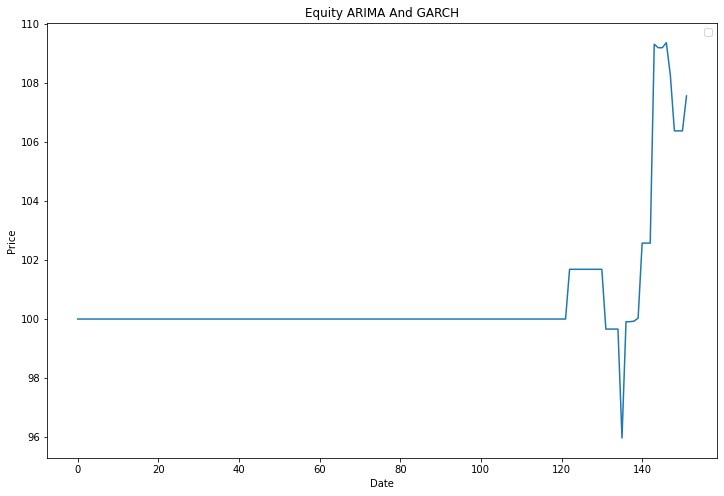

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(ArimaGarch)
plt.title('Equity ARIMA And GARCH')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


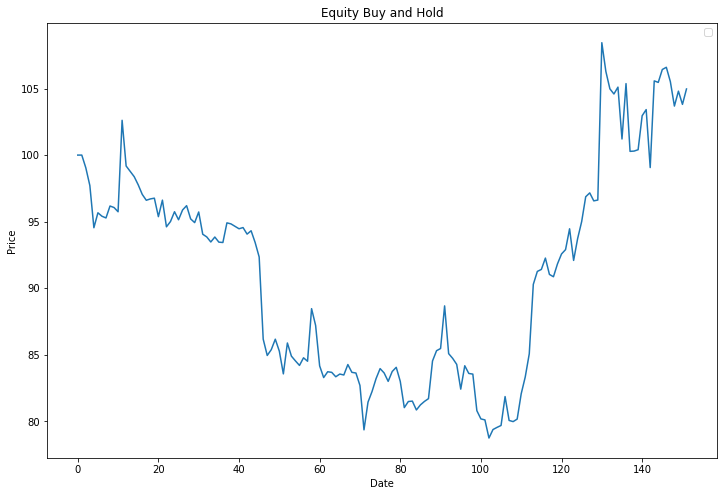

In [18]:
plt.figure(figsize=(12, 8))
plt.plot(BH)
plt.title('Equity Buy and Hold')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()